$C(x, y) = c_g (x, y)+U_{REF}(x, y)-2\alpha(x,y) A_0(x,y)$

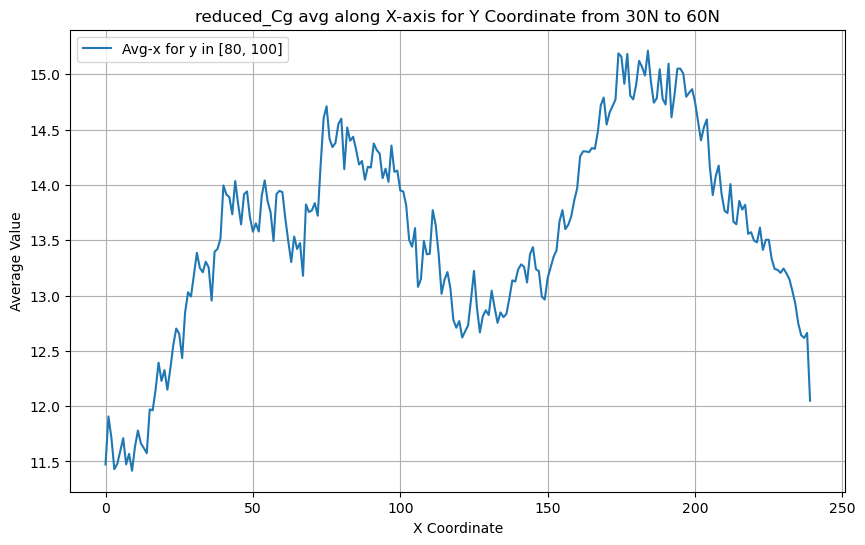

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

global reduced_Cg_avg_1D

# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "reduced_Cg_avg_1D.npy")
reduced_Cg_avg_1D = np.load(file_path)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reduced_Cg_avg_1D, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('reduced_Cg avg along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


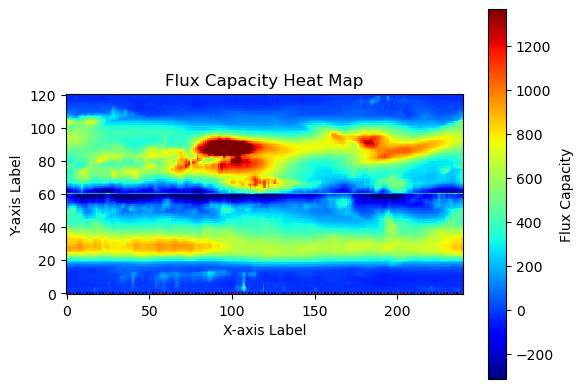

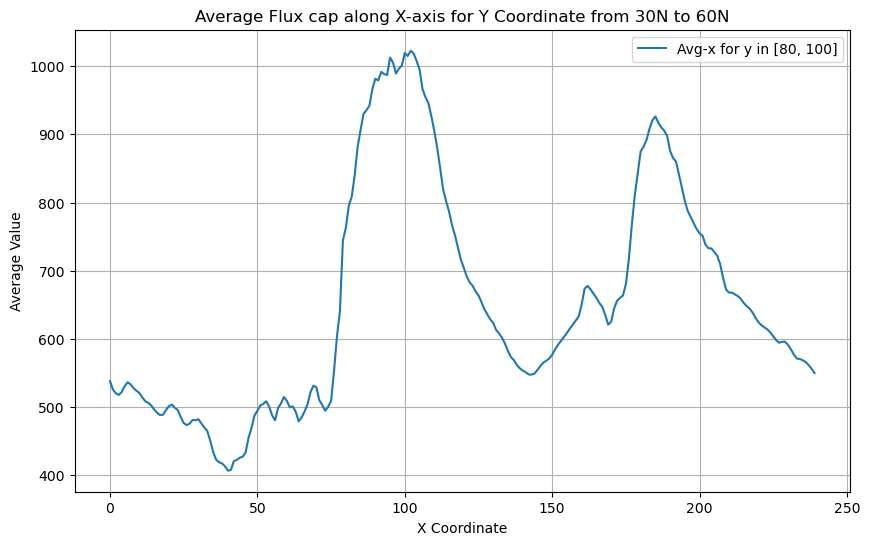

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "/scratch/negishi/yan481/KenYan_Traffic_Model/Flux_Capacity_DJF.npy"
capacity = np.load(file_path)

# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)


# Clip the capacity values to lie within the determined min and max
flux_capacity_2d = np.clip(capacity, vmin_val, vmax_val)

# Plot the 2D heat map
plt.imshow(flux_capacity_2d, cmap='jet', origin = 'lower', interpolation='nearest')
plt.colorbar(label='Flux Capacity')
plt.title('Flux Capacity Heat Map')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


y_range_data = flux_capacity_2d[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_flux_cap = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_flux_cap, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average Flux cap along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
zonal_avg_Cg = None
zonal_avg_u0 = None
zonal_avg_b = None
zonal_avg_a0 = None
zonal_avg_product = None
zonal_avg_Uref = None

Shape of A0: (121, 240)
Indices of nan values in A0: (array([], dtype=int64), array([], dtype=int64))


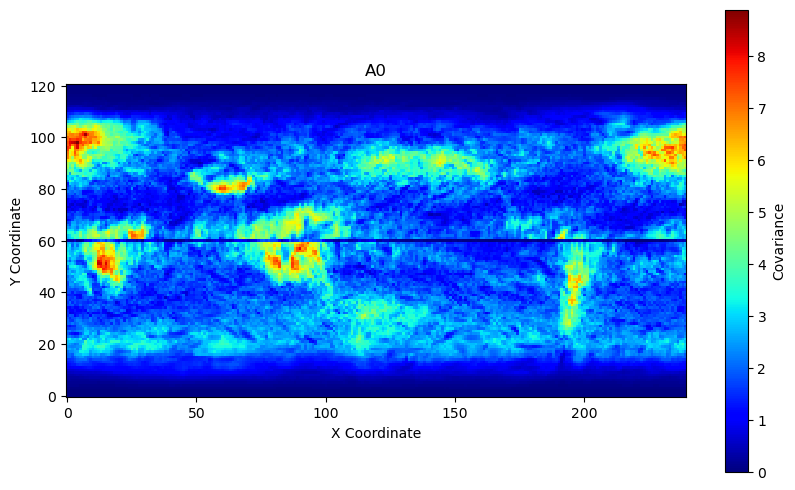

In [4]:
# load A_0 data

import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "dist_of_A0_winter.npy")

# Load the array
A0 = np.load(file_path)
print("Shape of A0:", A0.shape)

# Find the indices where A0 has nan values
nan_indices = np.where(np.isnan(A0))

print("Indices of nan values in A0:", nan_indices)

plt.figure(figsize=(10, 6))
plt.imshow(A0, cmap='jet', origin='lower', interpolation='nearest')  # Set cmap to 'jet' and origin to 'lower'
plt.colorbar(label='Covariance')
plt.title('A0')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()



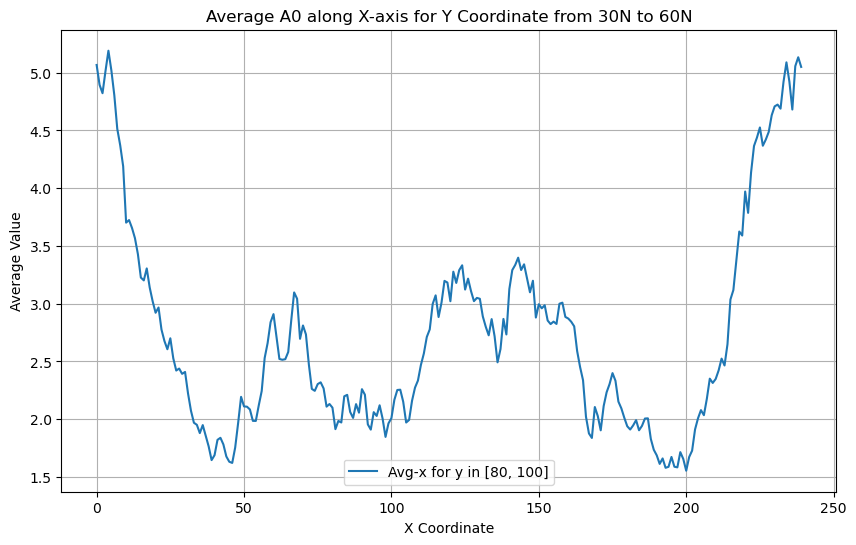

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

global zonal_avg_a0
# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = A0[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_a0 = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_a0, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average A0 along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
zonal_avg_alpha = None

(121, 240)


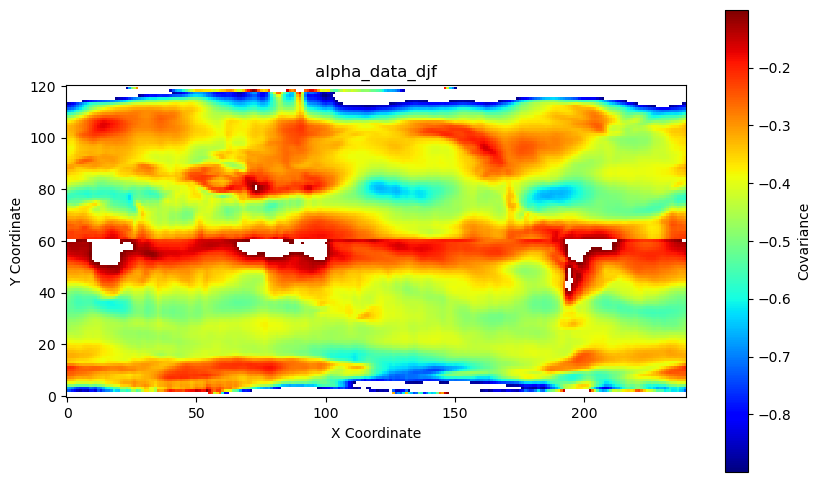

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
save_folder = "/scratch/negishi/yan481/KenYan_Traffic_Model/alpha_regression_DJF"
file_path = os.path.join(save_folder, 'slope_data_djf.npy')
alpha_data_djf = np.load(file_path, allow_pickle=True)
print(alpha_data_djf.shape)

alpha_data_djf[(alpha_data_djf < -0.9) | (alpha_data_djf > -0.1)] = np.nan
plt.figure(figsize=(10, 6))
plt.imshow(alpha_data_djf, cmap='jet', origin='lower', interpolation='nearest')  # Set cmap to 'jet' and origin to 'lower'
plt.colorbar(label='Covariance')
plt.title('alpha_data_djf')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()



(121, 240)


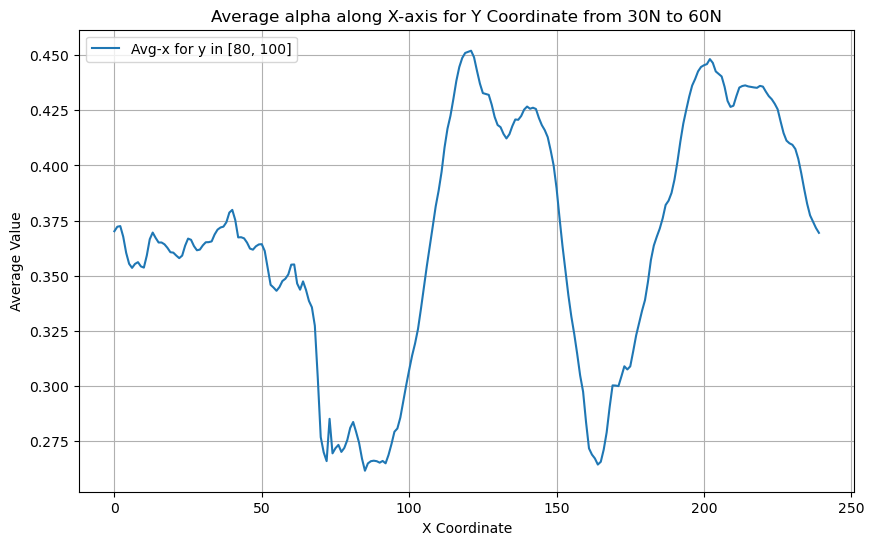

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt

save_folder = "/scratch/negishi/yan481/KenYan_Traffic_Model/alpha_regression_DJF"
file_path = os.path.join(save_folder, 'slope_data_djf.npy')
alpha_data_djf = np.load(file_path, allow_pickle=True)
print(alpha_data_djf.shape)
global zonal_avg_alpha

# Masking values outside the range [-0.9, -0.1]
alpha_data_djf[(alpha_data_djf < -0.9) | (alpha_data_djf > -0.1)] = np.nan

# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = alpha_data_djf[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_alpha = -np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_alpha, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average alpha along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


(121, 240)


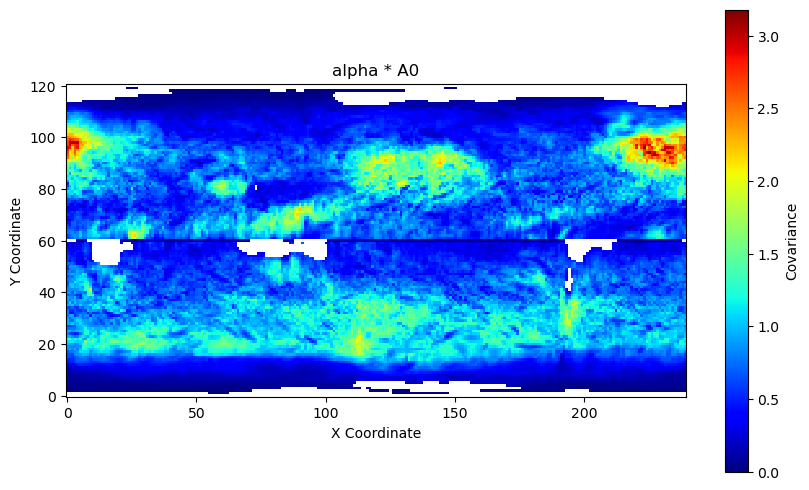

In [9]:
product = -alpha_data_djf * A0
print(product.shape)

plt.figure(figsize=(10, 6))
plt.imshow(product, cmap='jet', origin='lower', interpolation='nearest')  # Set cmap to 'jet' and origin to 'lower'
plt.colorbar(label='Covariance')
plt.title('alpha * A0')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


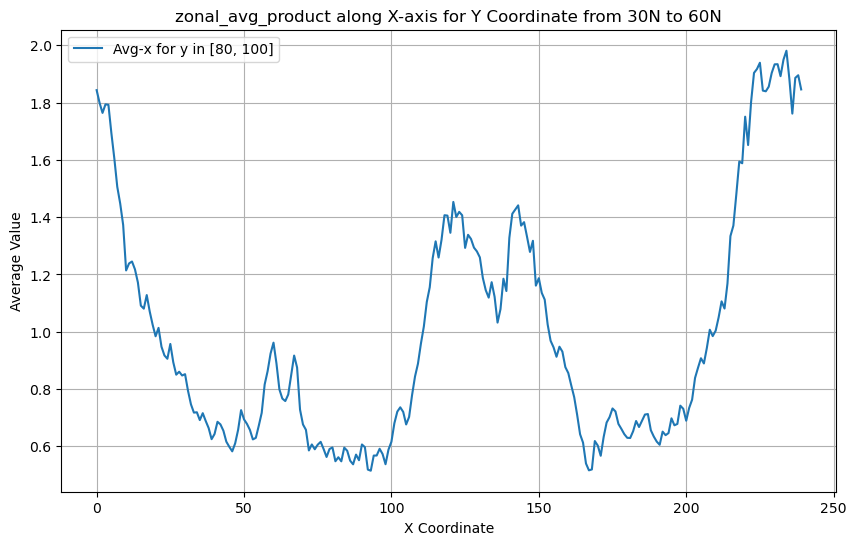

In [10]:
global zonal_avg_product


# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = product[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_product = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_product, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('zonal_avg_product along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


(121, 240)


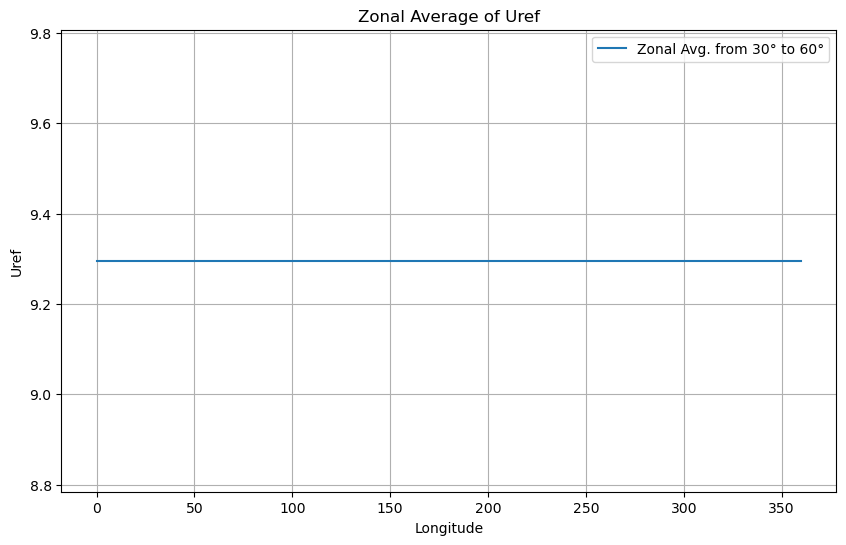

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Set the path to the saved .npy file
directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(directory, "time_averaged_column_Uref.npy")

# Load the array
time_averaged_Uref = np.load(file_path)

# Print shape or some initial values to confirm
print(time_averaged_Uref.shape)


def plot_zonal_avg_Uref(Lon, Uref, lat_range=(25, 65)):
    """
    Plot a zonal average of u0 for a specified latitudinal range.
    
    Parameters:
    - Lon: Longitudes array.
    - Uref: 2D array of Uref values.
    - lat_range: Tuple of (lat_start, lat_end) for which the zonal average should be calculated.
    
    Returns:
    - A matplotlib figure with the zonal average plot.
    """
    global zonal_avg_Uref
    
    # Calculate Lat array based on the new step and range
    Lat = np.linspace(90, -90, Uref.shape[0])
    
    # Determine indices corresponding to the given latitude range.
    lat_indices = np.where((Lat >= lat_range[0]) & (Lat <= lat_range[1]))[0]
    
    # Calculate the zonal average for the specified latitude range.
    zonal_avg_Uref = np.mean(Uref[lat_indices, :], axis=0)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(Lon, zonal_avg_Uref, label=f"Zonal Avg. from {lat_range[0]}° to {lat_range[1]}°")
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Uref')
    ax.set_title('Zonal Average of Uref')
    ax.grid(True)
    ax.legend()
    
    return fig

# Define lon and lat arrays based on new step and range
lon = np.linspace(0, 360, 240)
lat = np.linspace(90, -90, 121)

# Use the function
fig = plot_zonal_avg_Uref(lon, time_averaged_Uref, lat_range=(30, 60))
plt.show()


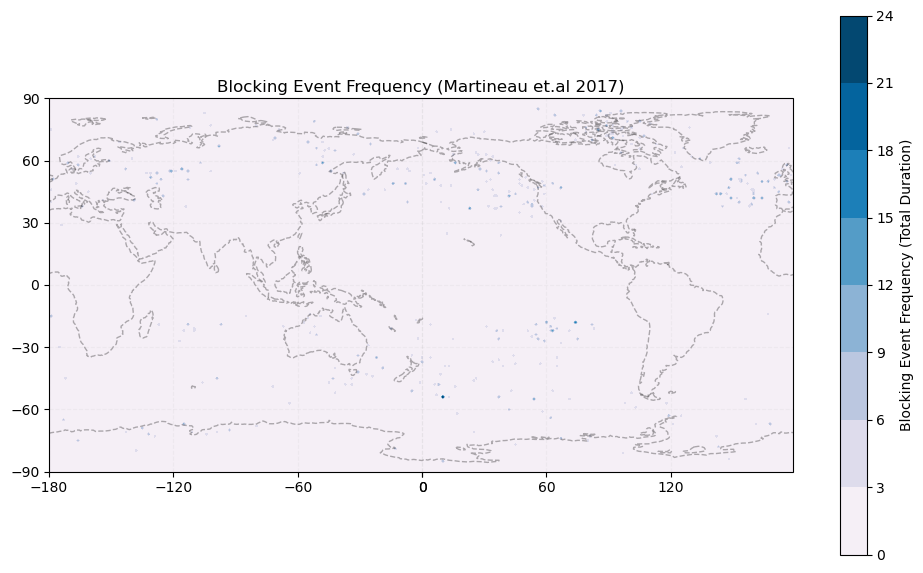

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import datetime



# Load blocking events
data1 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0NH.npy', allow_pickle=True)
data2 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0SH.npy', allow_pickle=True)

# Vertically stack the arrays
blocking_data = np.vstack((data1, data2))

# Filter rows based on the month and year condition
filtered = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered.append(event)

# Convert the filtered list back to a NumPy array
filtered_blocking_data = np.array(filtered)


# Create an empty frequency grid
frequency_grid = np.zeros((181, 360))

# Process each event
for event in filtered_blocking_data:
    event_date, duration_str, lon_str, lat_str = event
    duration = int(duration_str.split(":")[1].strip())  # Extract duration
    lon = int(lon_str.split(":")[1].strip())  # Extract longitude
    lat = int(lat_str.split(":")[1].strip())  # Extract latitude

    # Convert latitude and longitude to grid indices
    lat_idx = int(lat + 90)  # Shift latitude index to start from 0 at -90
    lon_idx = int(lon) if lon >= 0 else int(360 + lon)  # Adjust for negative longitudes

    # Accumulate the duration in the grid
    frequency_grid[lat_idx, lon_idx] += duration

# Plotting
fig = plt.figure(figsize=[12, 7])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(np.arange(0, 360), np.arange(-90, 91), frequency_grid, transform=ccrs.PlateCarree(), cmap='PuBu')
ax.coastlines(linestyle="--", alpha=0.3)
ax.gridlines(linestyle="--", alpha=0.1)
ax.set_xticks(np.linspace(-180, 180, 7), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 7), crs=ccrs.PlateCarree())
plt.colorbar(label='Blocking Event Frequency (Total Duration)')
plt.title('Blocking Event Frequency (Martineau et.al 2017)', pad=5)
plt.show()

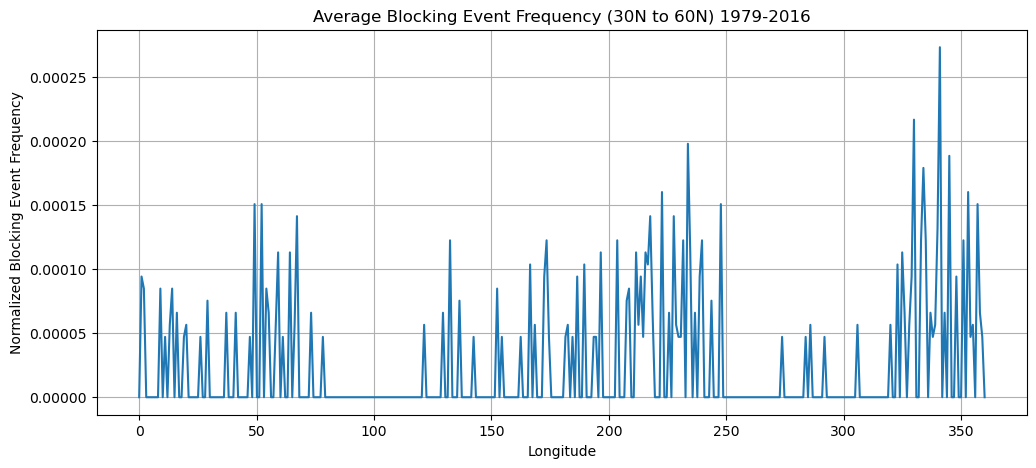

In [27]:
# skip this one

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import datetime



# Load blocking events
data1 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0NH.npy', allow_pickle=True)
data2 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0SH.npy', allow_pickle=True)

# Vertically stack the arrays
blocking_data = np.vstack((data1, data2))

# Filter rows based on the month and year condition
filtered = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered.append(event)

# Convert the filtered list back to a NumPy array
filtered_blocking_data = np.array(filtered)


# Create an empty frequency grid
frequency_grid = np.zeros((181, 360))

# Process each event
for event in filtered_blocking_data:
    event_date, duration_str, lon_str, lat_str = event
    duration = int(duration_str.split(":")[1].strip())  # Extract duration
    lon = int(lon_str.split(":")[1].strip())  # Extract longitude
    lat = int(lat_str.split(":")[1].strip())  # Extract latitude

    # Convert latitude and longitude to grid indices
    lat_idx = int(lat + 90)  # Shift latitude index to start from 0 at -90
    lon_idx = int(lon) if lon >= 0 else int(360 + lon)  # Adjust for negative longitudes

    # Accumulate the duration in the grid
    frequency_grid[lat_idx, lon_idx] += duration

# Modify the latitude range to 30N to 60N
lat_start, lat_end = 30, 60  # Latitude range
lat_start_idx, lat_end_idx = lat_start + 90, lat_end + 90  # Convert to grid indices

# Filter the frequency grid for the specified latitude range
filtered_grid = frequency_grid[lat_start_idx:lat_end_idx + 1]

# Calculate the average along the y-axis
avg_frequency = np.mean(filtered_grid, axis=0)

# Normalize by the total number of days in the range 1979 to 2016
total_days = (2016 - 1979 + 1) * 3 * 30  # Approximation: 3 months per year * 30 days per month
normalized_frequency = avg_frequency / total_days

# Plotting the one-dimensional frequency graph
plt.figure(figsize=[12, 5])
plt.plot(np.linspace(0, 360, 360), normalized_frequency)
plt.xlabel('Longitude')
plt.ylabel('Normalized Blocking Event Frequency')
plt.title('Average Blocking Event Frequency (30N to 60N) 1979-2016')
plt.grid(True)
plt.show()

(181, 360)


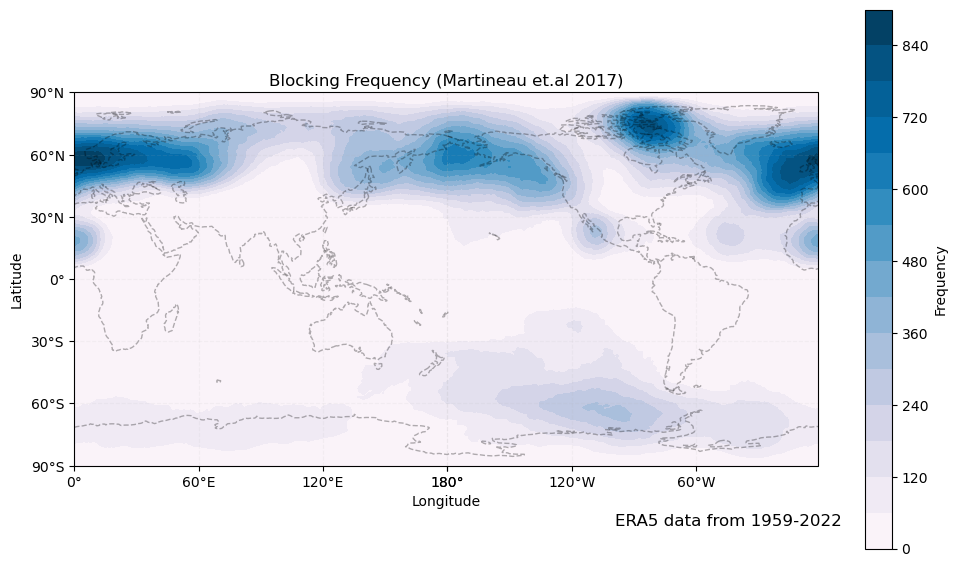

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 11 17:23:54 2023

@author: kaying
"""

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 

import numpy as np
NH = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/Blockingfrequency4.0NH.npy")
SH = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/Blockingfrequency4.0SH.npy")
BlockingFreq = NH+SH


Plot = BlockingFreq
Lat = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")
Period = "from 1959-2022"
levs = 15
fig = plt.figure(figsize=[12,7])

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=180))

plt.contourf(Lon, Lat,Plot, levs,transform=ccrs.PlateCarree(),  cmap='PuBu')


ax.coastlines(linestyle="--", alpha=0.3)
ax.gridlines(linestyle="--", alpha=0.1)
ax.set_xticks([-180,-120,-60,0,60,120,180],crs=ccrs.PlateCarree())
ax.set_yticks([-90,-60,-30,0,30,60,90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(transform_precision = 1,zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cb=plt.colorbar()

cb.set_label('Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Blocking Frequency (Martineau et.al 2017)', pad=5)

plt.suptitle('ERA5 data '+str(Period), x=0.67,y=0.16)
print(BlockingFreq.shape)



In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 

import numpy as np

BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")


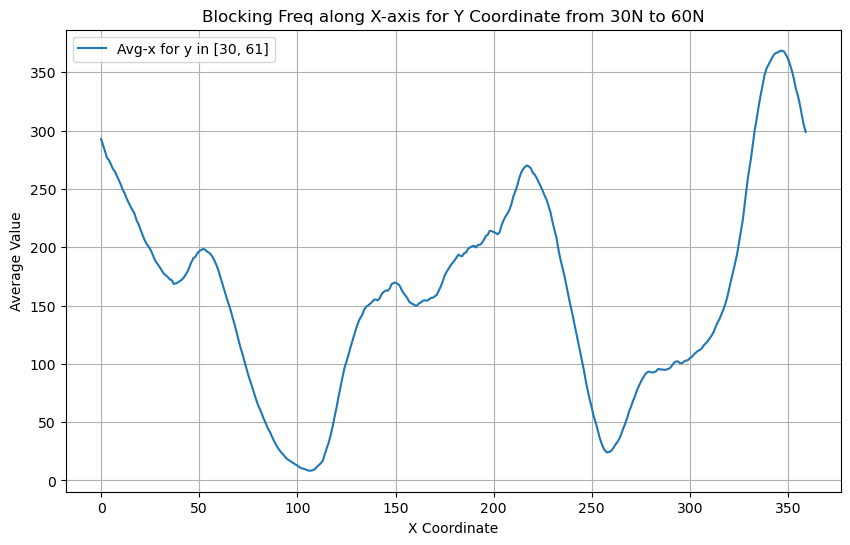

In [15]:
global zonal_avg_b


# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
# y_range_data = BlockingFreq[120:151, :]
y_range_data = BlockingFreq[30:61, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_b = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_b, label='Avg-x for y in [30, 61]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Blocking Freq along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


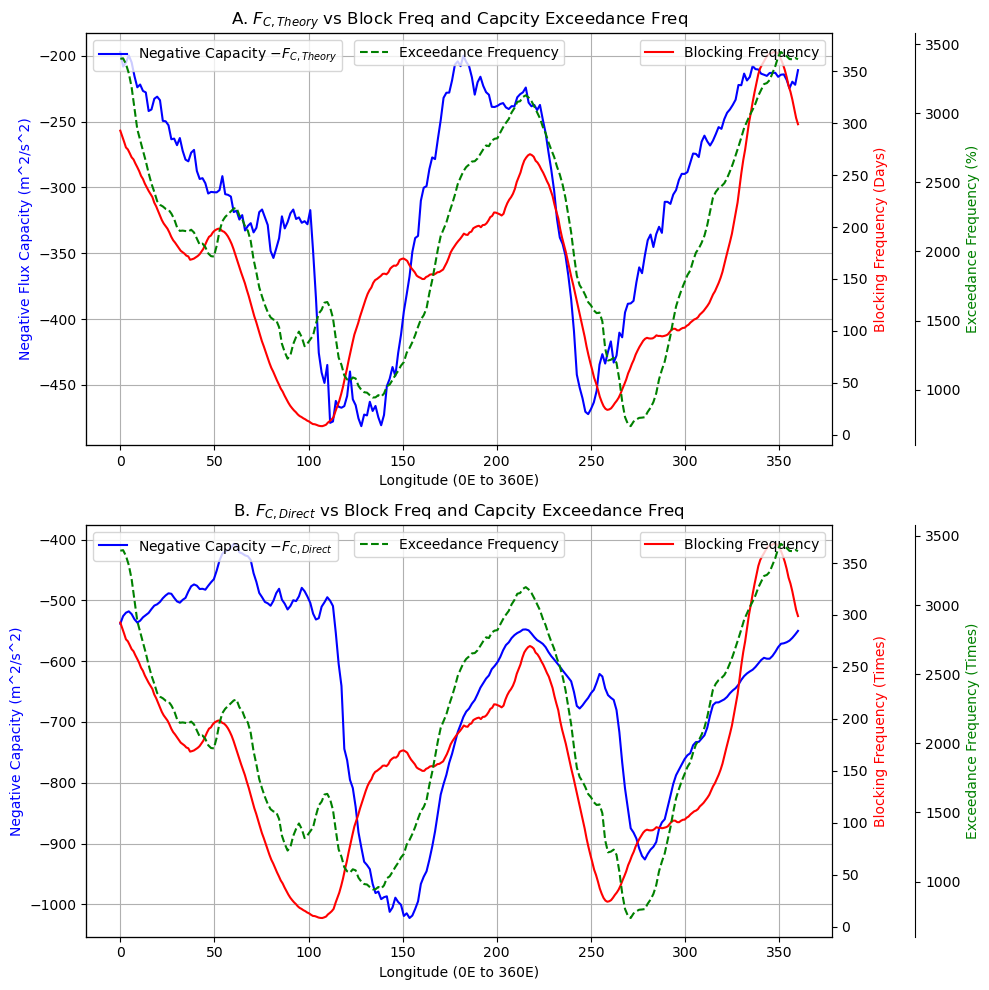

In [16]:

#### Correct 0124

import matplotlib.pyplot as plt
import numpy as np


file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0221/", "zonal_freq_filtered.npy")

# file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis/", "zonal_freq.npy")
exceedance_freq = np.load(file_path)





# Define the longitudes
longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

# Create a figure
plt.figure(figsize=(10, 10))

# Create the first subplot
ax1 = plt.subplot(2, 1, 1)  # 1 row, 2 columns, 1st subplot
ax2 = ax1.twinx()
ax5 = ax1.twinx()

# Plot on the first subplot
ax1.plot(longitudes, -(reduced_Cg_avg_1D + zonal_avg_Uref - 2 * zonal_avg_product) ** 2 / (4 * zonal_avg_alpha), label=r'Negative Capacity $-F_{C, Theory}$', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax5.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='green', linestyle='--')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Flux Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency (Days)', color='red')
ax1.set_title(r'A. $F_{C, Theory}$ vs Block Freq and Capcity Exceedance Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Adjust the position of the rightmost y-axis
ax5.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Exceedance Frequency (%)', color='green')
ax5.legend(loc='upper center')

# Create the second subplot
ax3 = plt.subplot(2, 1, 2)  # 1 row, 2 columns, 2nd subplot
ax4 = ax3.twinx()
ax6 = ax3.twinx()

# Plot on the second subplot
ax3.plot(longitudes, -zonal_avg_flux_cap, label=r'Negative Capacity $-F_{C, Direct}$', color='blue')
ax4.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax6.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='green', linestyle='--')

ax3.set_xlabel('Longitude (0E to 360E)')
ax3.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax4.set_ylabel('Blocking Frequency (Times)', color='red')
ax3.set_title(r'B. $F_{C, Direct}$ vs Block Freq and Capcity Exceedance Freq')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.grid(True)

# Adjust the position of the rightmost y-axis
ax6.spines['right'].set_position(('outward', 60))
ax6.set_ylabel('Exceedance Frequency (Times)', color='green')
ax6.legend(loc='upper center')

# Show the plot with adjusted layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # Increase the horizontal spacing between subplots
plt.show()


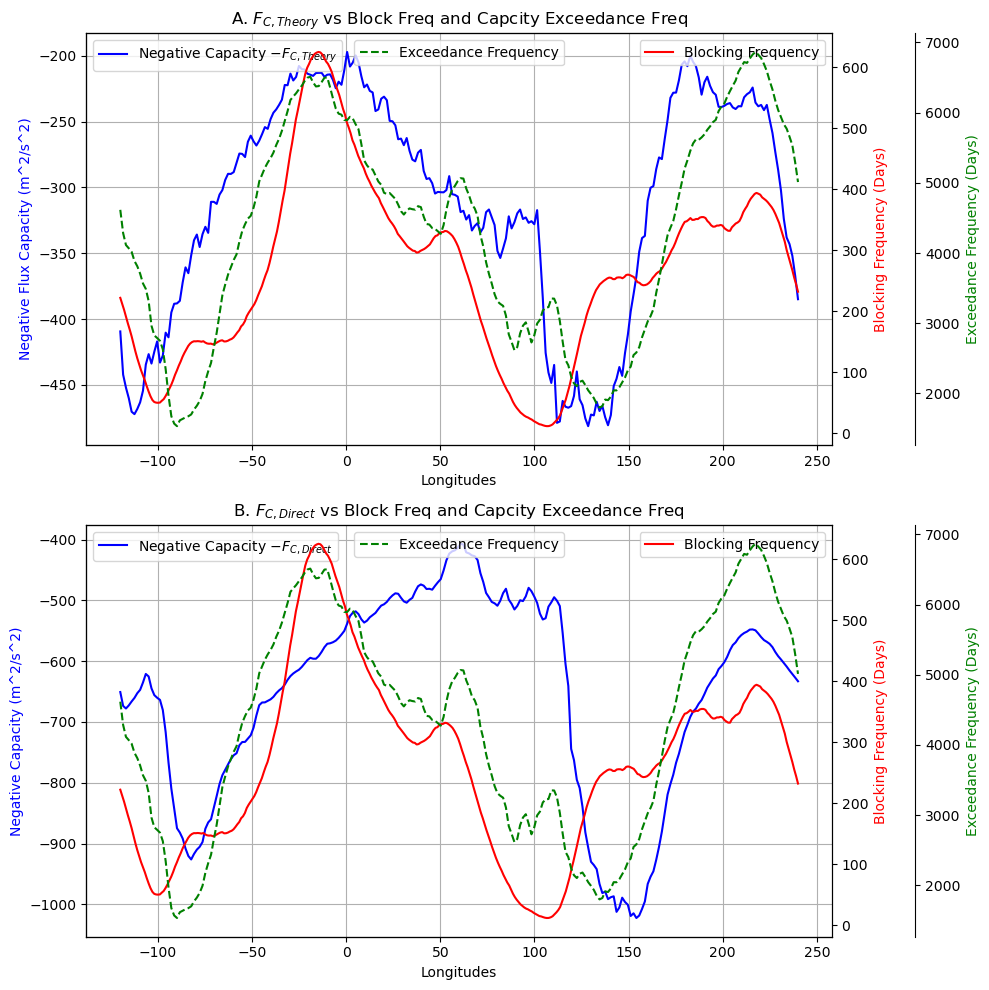

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os

def roll_data(data, shift):
    return np.roll(data, shift)

# Calculate the shift needed (80 points for a shift from 180E to 60E)
shift_points = 80

# Load and shift the data
file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0111/", "zonal_freq_filtered.npy")
exceedance_freq = np.load(file_path)
exceedance_freq_shifted = roll_data(exceedance_freq, shift_points)
cap1_shifted = roll_data(-(reduced_Cg_avg_1D + zonal_avg_Uref - 2 * zonal_avg_product) ** 2 / (4 * zonal_avg_alpha), shift_points)
cap2_shifted = roll_data(-zonal_avg_flux_cap, shift_points)
block_shifted = roll_data(zonal_avg_b, 120)

# Define and shift the longitudes
longitudes_shifted = np.linspace(-120, 240, 240)
longitudes2_shifted = np.linspace(-120, 240, 360)

def shift_longitudes(longitudes, new_center):
    degrees_per_point = 360 / len(longitudes)
    shift_points = int((new_center - 180) / degrees_per_point)
    return np.roll(longitudes, shift_points)

# Define the longitudes
longitudes = np.linspace(0, 360, 240, endpoint=False)
longitudes2 = np.linspace(0, 360, 360, endpoint=False)

# Shift longitudes to make 60E the center
shifted_longitudes = shift_longitudes(longitudes, 60)
shifted_longitudes2 = shift_longitudes(longitudes2, 60)



# Create a figure
plt.figure(figsize=(10, 10))

# Create the first subplot
ax1 = plt.subplot(2, 1, 1)  # 1 row, 2 columns, 1st subplot
ax2 = ax1.twinx()
ax5 = ax1.twinx()

# Plot on the first subplot
ax1.plot(longitudes_shifted, cap1_shifted, label=r'Negative Capacity $-F_{C, Theory}$', color='blue')
ax2.plot(longitudes2_shifted, block_shifted, label='Blocking Frequency', color='red')
ax5.plot(longitudes_shifted, exceedance_freq_shifted, label='Exceedance Frequency', color='green', linestyle='--')

ax1.set_xlabel('Longitudes')
ax1.set_ylabel('Negative Flux Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency (Days)', color='red')
ax1.set_title(r'A. $F_{C, Theory}$ vs Block Freq and Capcity Exceedance Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Adjust the position of the rightmost y-axis
ax5.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Exceedance Frequency (Days)', color='green')
ax5.legend(loc='upper center')

# Create the second subplot
ax3 = plt.subplot(2, 1, 2)  # 1 row, 2 columns, 2nd subplot
ax4 = ax3.twinx()
ax6 = ax3.twinx()

# Plot on the second subplot
ax3.plot(longitudes_shifted, cap2_shifted, label=r'Negative Capacity $-F_{C, Direct}$', color='blue')
ax4.plot(longitudes2_shifted, block_shifted, label='Blocking Frequency', color='red')
ax6.plot(longitudes_shifted, exceedance_freq_shifted, label='Exceedance Frequency', color='green', linestyle='--')

ax3.set_xlabel('Longitudes')
ax3.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax4.set_ylabel('Blocking Frequency (Days)', color='red')
ax3.set_title(r'B. $F_{C, Direct}$ vs Block Freq and Capcity Exceedance Freq')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.grid(True)

# Adjust the position of the rightmost y-axis
ax6.spines['right'].set_position(('outward', 60))
ax6.set_ylabel('Exceedance Frequency (Days)', color='green')
ax6.legend(loc='upper center')

# Show the plot with adjusted layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # Increase the horizontal spacing between subplots
plt.show()

(121, 240)


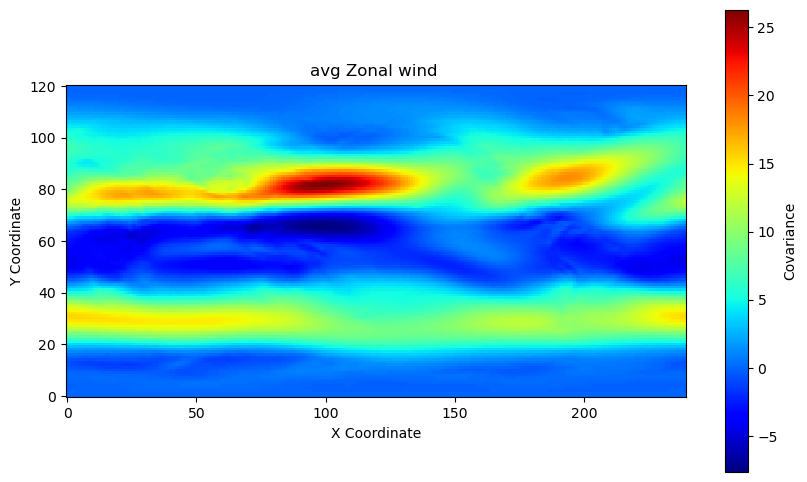

In [11]:
# load u_0 data

import numpy as np
import os

# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "dist_of_zonal_wind_u_mean_winter.npy")

# Load the array
u0 = np.load(file_path)
print(u0.shape)

plt.figure(figsize=(10, 6))
plt.imshow(u0, cmap='jet', origin='lower', interpolation='nearest')  # Set cmap to 'jet' and origin to 'lower'
plt.colorbar(label='Covariance')
plt.title('avg Zonal wind ')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


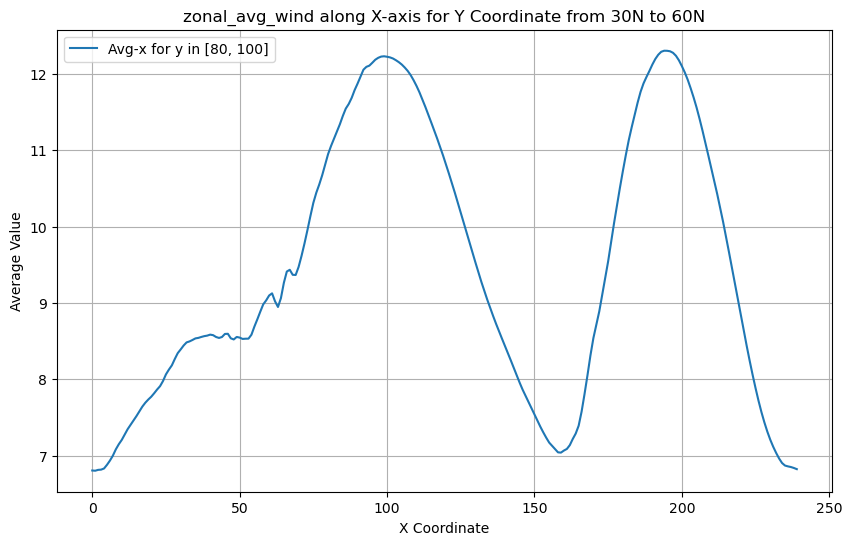

In [12]:
global zonal_avg_u0


# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = u0[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_u0 = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_u0, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('zonal_avg_wind along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


Shape of reduced_Cg: (121, 240)


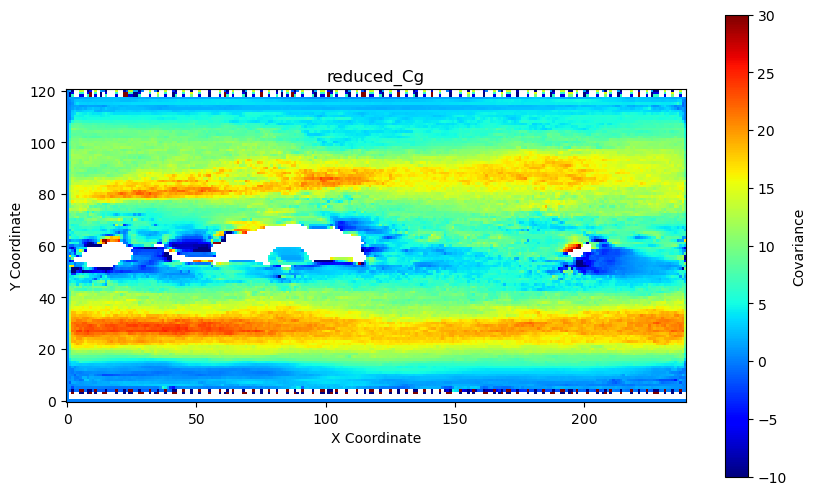

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "reduced_Cg.npy")

# Load the array
reduced_Cg = np.load(file_path)
# reduced_Cg[(reduced_Cg < -10) | (reduced_Cg > 60)] = np.nan
print("Shape of reduced_Cg:", reduced_Cg.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(reduced_Cg, cmap='jet', origin='lower', interpolation='nearest', vmin=-10, vmax=30)  # Set cmap to 'jet', origin to 'lower', and colormap bounds
plt.colorbar(label='Covariance')
plt.title('reduced_Cg')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


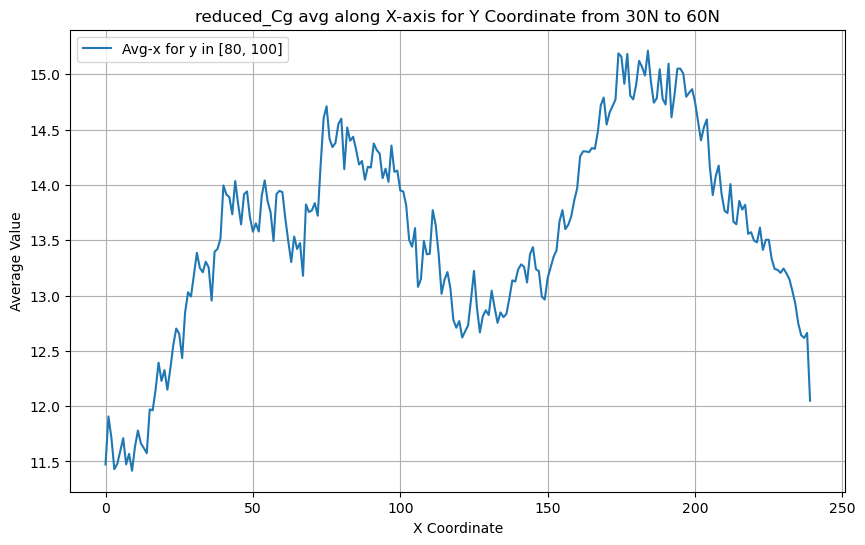

In [14]:
global reduced_Cg_avg_1D

# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "reduced_Cg_avg_1D.npy")
reduced_Cg_avg_1D = np.load(file_path)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reduced_Cg_avg_1D, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('reduced_Cg avg along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


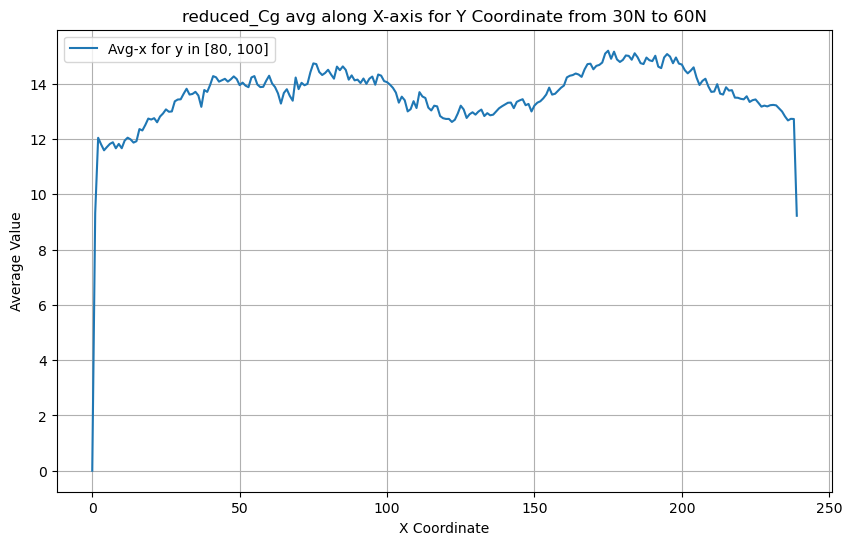

In [16]:
global zonal_avg_Cg


# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = reduced_Cg[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_Cg = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_Cg, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('reduced_Cg avg along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


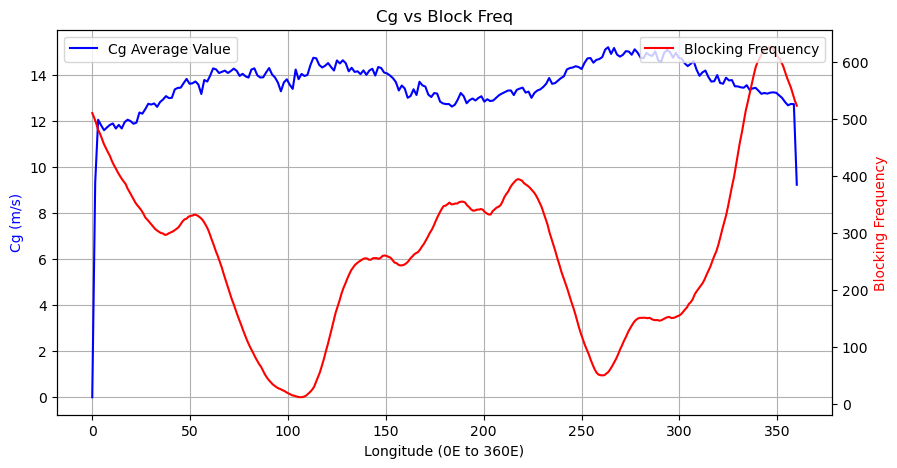

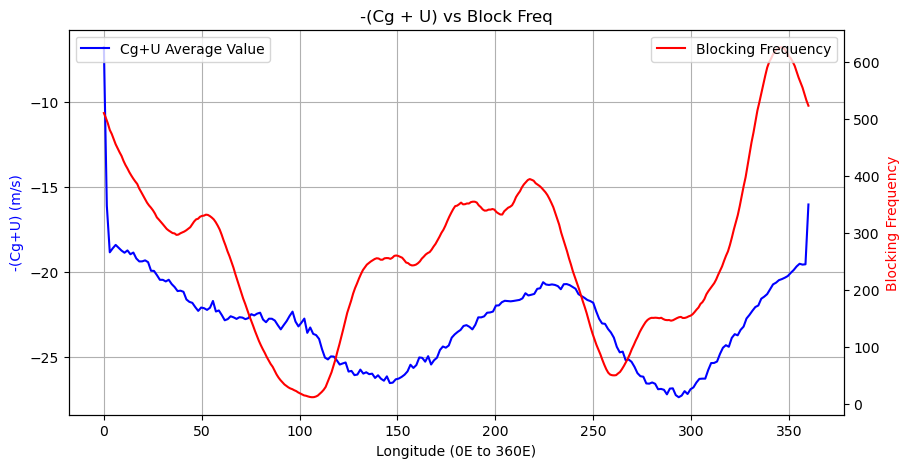

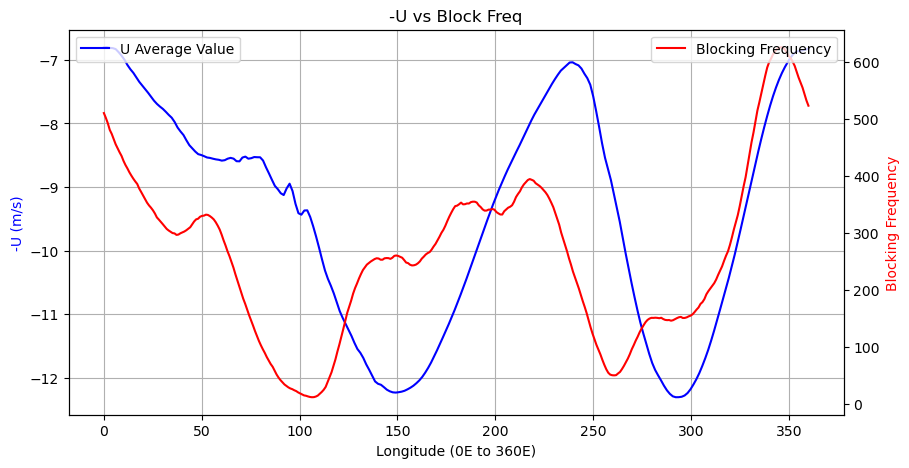

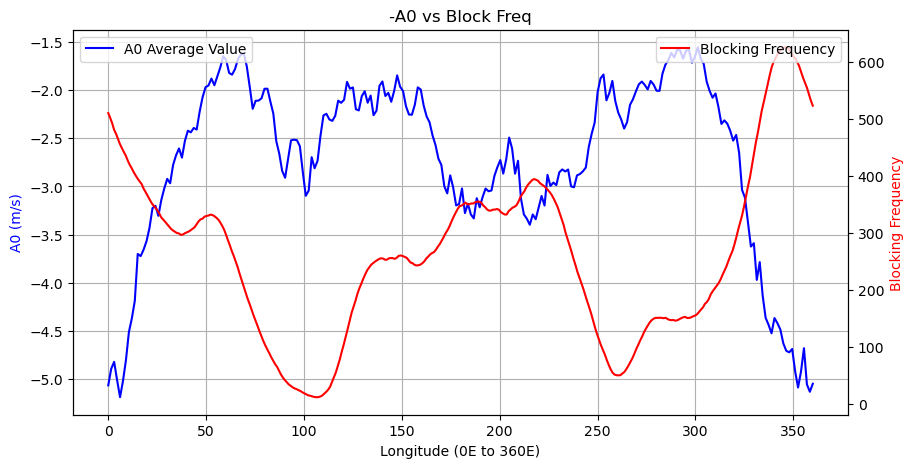

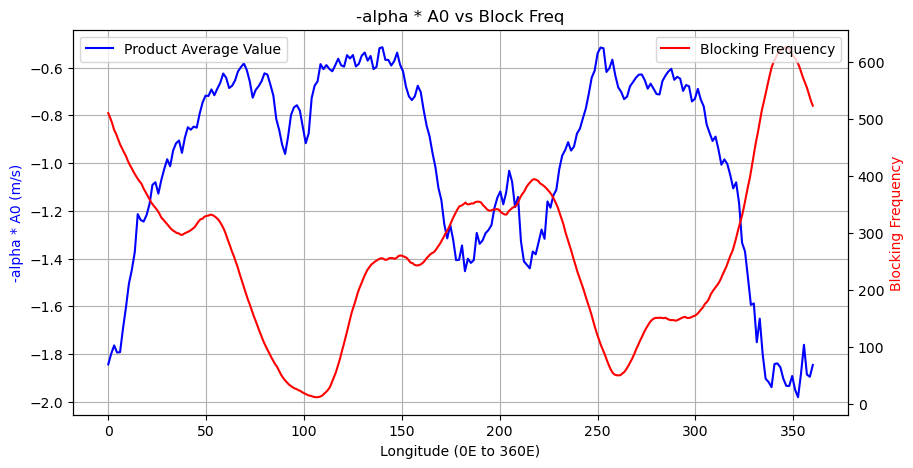

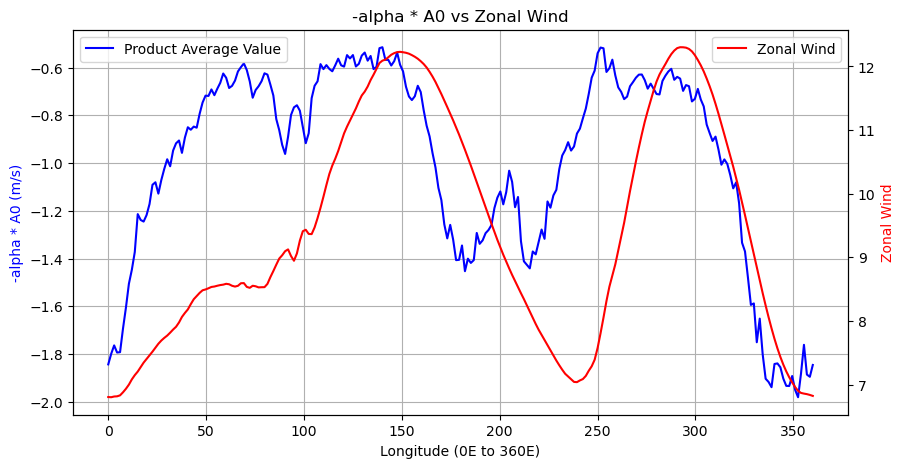

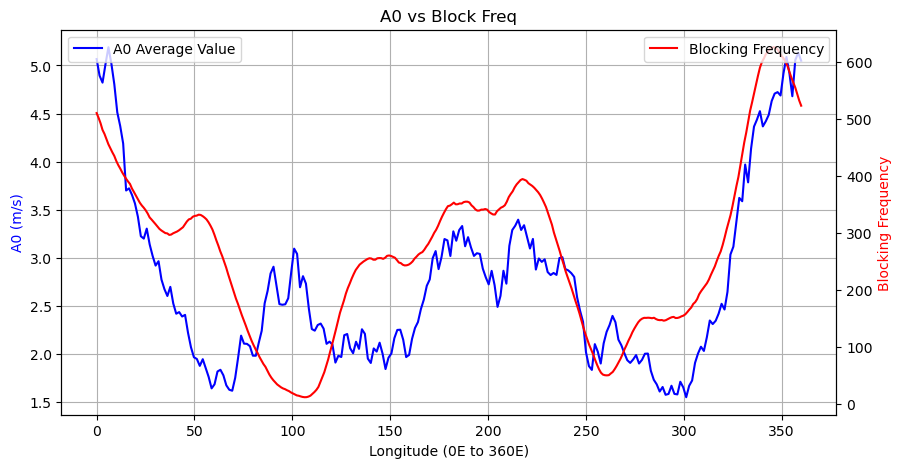

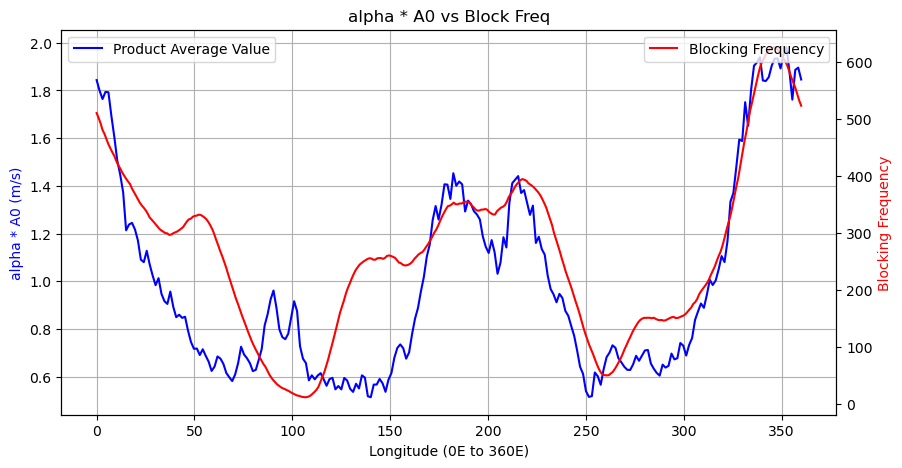

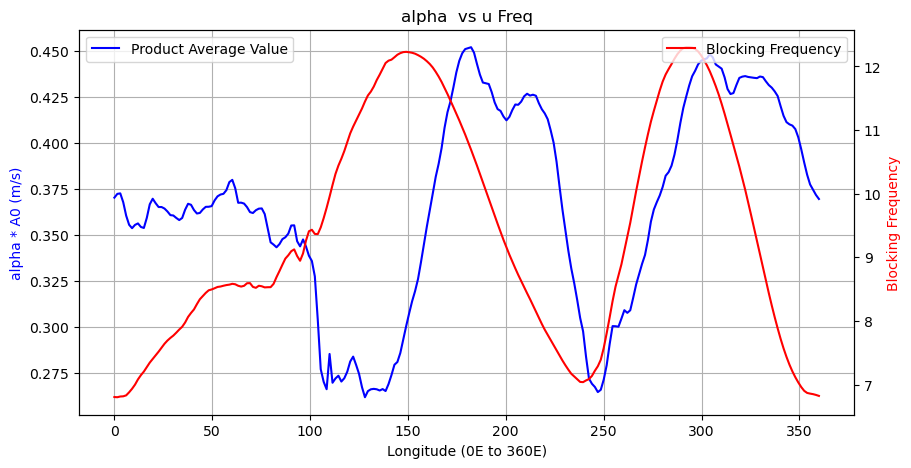

In [17]:
import numpy as np
import matplotlib.pyplot as plt



longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

# 第一个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, zonal_avg_Cg, label='Cg Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Cg (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('Cg vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

# 第二个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

# ax1.plot(longitudes, zonal_avg_Cg+zonal_avg_u0, label='Cg+U Average Value', color='blue')
ax1.plot(longitudes, -(zonal_avg_Cg+zonal_avg_u0), label='Cg+U Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('-(Cg+U) (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-(Cg + U) vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

# 第三个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -zonal_avg_u0, label='U Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('-U (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-U vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

# 第4个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -zonal_avg_a0, label='A0 Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('A0 (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-A0 vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

# 第5个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -zonal_avg_product, label='Product Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('-alpha * A0 (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-alpha * A0 vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

# 第6个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -zonal_avg_product, label='Product Average Value', color='blue')
ax2.plot(longitudes, zonal_avg_u0, label='Zonal Wind', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('-alpha * A0 (m/s)', color='blue')
ax2.set_ylabel('Zonal Wind', color='red')

ax1.set_title('-alpha * A0 vs Zonal Wind')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

# 第4个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, zonal_avg_a0, label='A0 Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('A0 (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('A0 vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

# 第5个折线图
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, zonal_avg_product, label='Product Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('alpha * A0 (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('alpha * A0 vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()



plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, zonal_avg_alpha, label='Product Average Value', color='blue')
ax2.plot(longitudes, zonal_avg_u0, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('alpha * A0 (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('alpha  vs u Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()



In [ ]:
# C = Uref+Cg - 2\alpha * A0

In [ ]:
# u = Uref -\alpha * A

(121, 240)


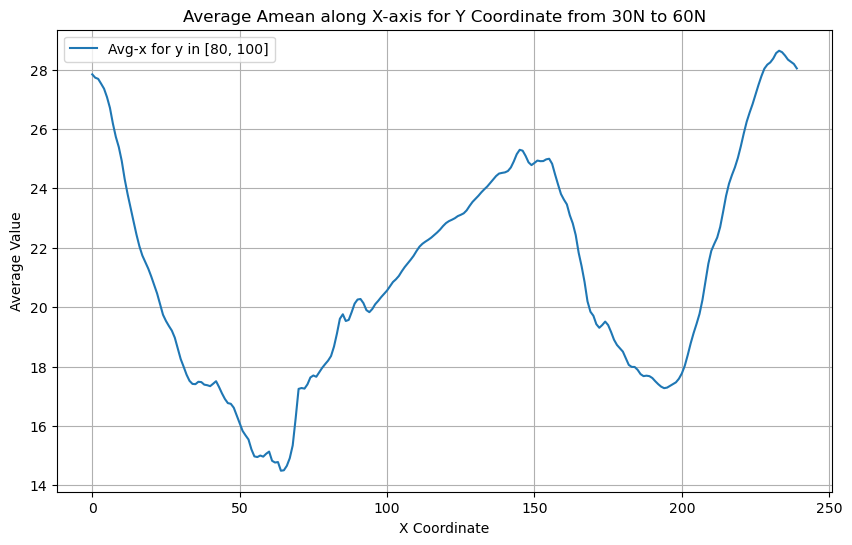

In [18]:
import numpy as np
import os

zonal_avg_Amean = None
# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "dist_of_A0_mean_winter.npy")

# Load the array
Amean = np.load(file_path)
print(Amean.shape)

import numpy as np
import os
import matplotlib.pyplot as plt

global zonal_avg_Amean
# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = Amean[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_Amean = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_Amean, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average Amean along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


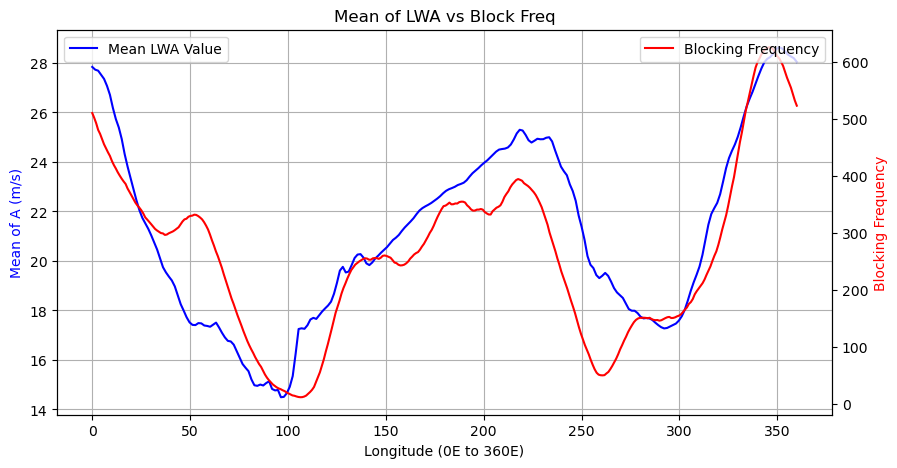

In [19]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, zonal_avg_Amean, label='Mean LWA Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Mean of A (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('Mean of LWA vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

In [20]:
import numpy as np

# Set the path to the saved .npy file
directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(directory, "time_averaged_column_Uref.npy")

# Load the array
time_averaged_Uref = np.load(file_path)

# Print shape or some initial values to confirm
print(time_averaged_Uref.shape)
print(time_averaged_Uref[:5,:5])  # prints first 5x5 block of the loaded data


(121, 240)
[[1.37669865e-16 1.37669865e-16 1.37669865e-16 1.37669865e-16
  1.37669865e-16]
 [1.41652768e-01 1.41652768e-01 1.41652768e-01 1.41652768e-01
  1.41652768e-01]
 [4.48748958e-01 4.48748958e-01 4.48748958e-01 4.48748958e-01
  4.48748958e-01]
 [8.10023753e-01 8.10023753e-01 8.10023753e-01 8.10023753e-01
  8.10023753e-01]
 [1.18407164e+00 1.18407164e+00 1.18407164e+00 1.18407164e+00
  1.18407164e+00]]


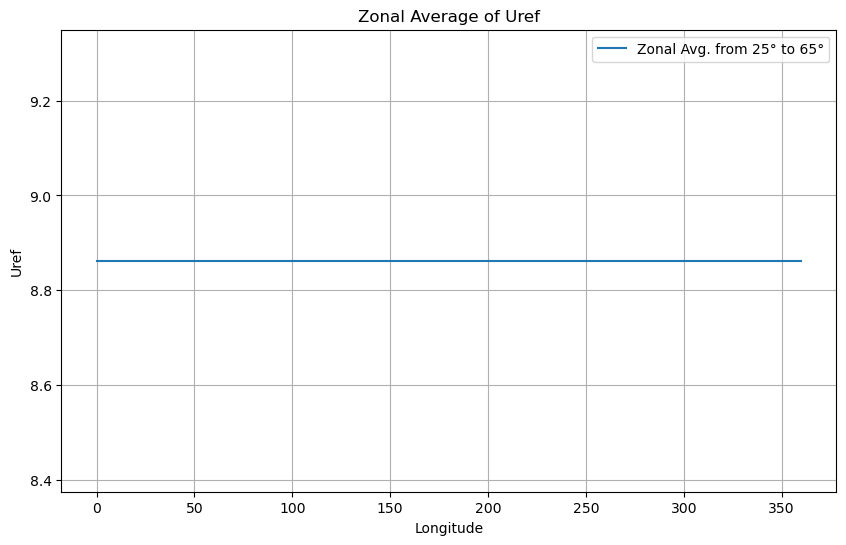

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_zonal_avg_Uref(Lon, Uref, lat_range=(25, 65)):
    """
    Plot a zonal average of u0 for a specified latitudinal range.
    
    Parameters:
    - Lon: Longitudes array.
    - Uref: 2D array of Uref values.
    - lat_range: Tuple of (lat_start, lat_end) for which the zonal average should be calculated.
    
    Returns:
    - A matplotlib figure with the zonal average plot.
    """
    global zonal_avg_Uref
    
    # Calculate Lat array based on the new step and range
    Lat = np.linspace(90, -90, Uref.shape[0])
    
    # Determine indices corresponding to the given latitude range.
    lat_indices = np.where((Lat >= lat_range[0]) & (Lat <= lat_range[1]))[0]
    
    # Calculate the zonal average for the specified latitude range.
    zonal_avg_Uref = np.mean(Uref[lat_indices, :], axis=0)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(Lon, zonal_avg_Uref, label=f"Zonal Avg. from {lat_range[0]}° to {lat_range[1]}°")
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Uref')
    ax.set_title('Zonal Average of Uref')
    ax.grid(True)
    ax.legend()
    
    return fig

# Define lon and lat arrays based on new step and range
lon = np.linspace(0, 360, 240)
lat = np.linspace(90, -90, 121)

# Use the function
fig = plot_zonal_avg_Uref(lon, time_averaged_Uref, lat_range=(25, 65))
plt.show()


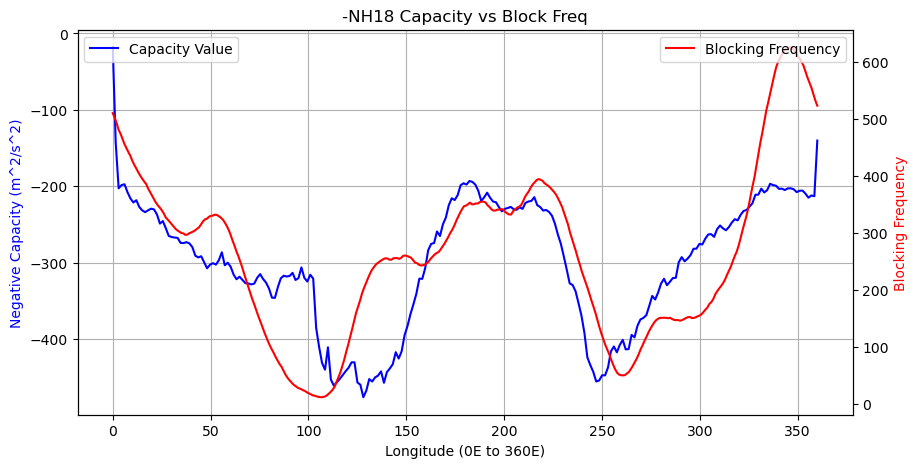

In [22]:
longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(zonal_avg_Cg+zonal_avg_Uref-2*zonal_avg_product)**2/(4*zonal_avg_alpha), label='Capacity Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-NH18 Capacity vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

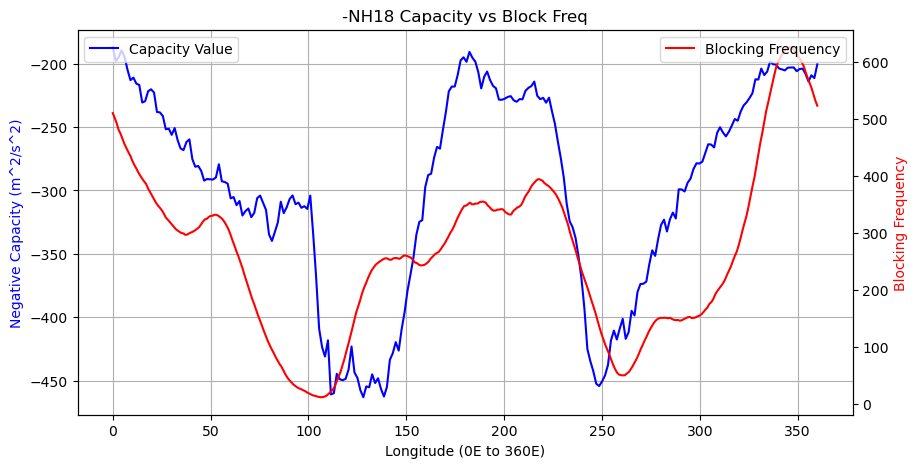

In [23]:
longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(reduced_Cg_avg_1D+zonal_avg_Uref-2*zonal_avg_product)**2/(4*zonal_avg_alpha), label='Capacity Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-NH18 Capacity vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

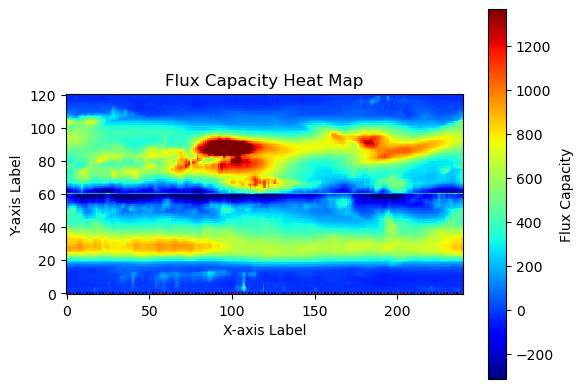

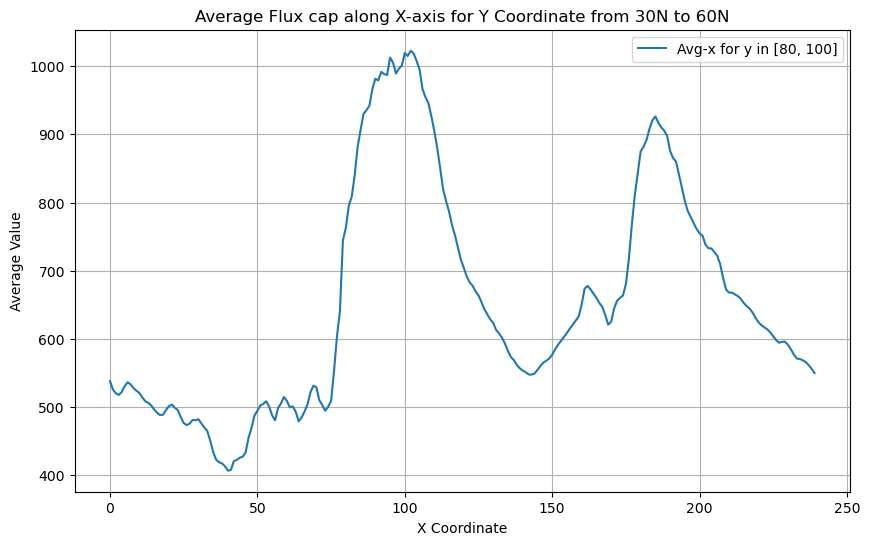

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "/scratch/negishi/yan481/KenYan_Traffic_Model/Flux_Capacity_DJF.npy"
capacity = np.load(file_path)

# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)


# Clip the capacity values to lie within the determined min and max
flux_capacity_2d = np.clip(capacity, vmin_val, vmax_val)

# Plot the 2D heat map
plt.imshow(flux_capacity_2d, cmap='jet', origin = 'lower', interpolation='nearest')
plt.colorbar(label='Flux Capacity')
plt.title('Flux Capacity Heat Map')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


y_range_data = flux_capacity_2d[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_flux_cap = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_flux_cap, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average Flux cap along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


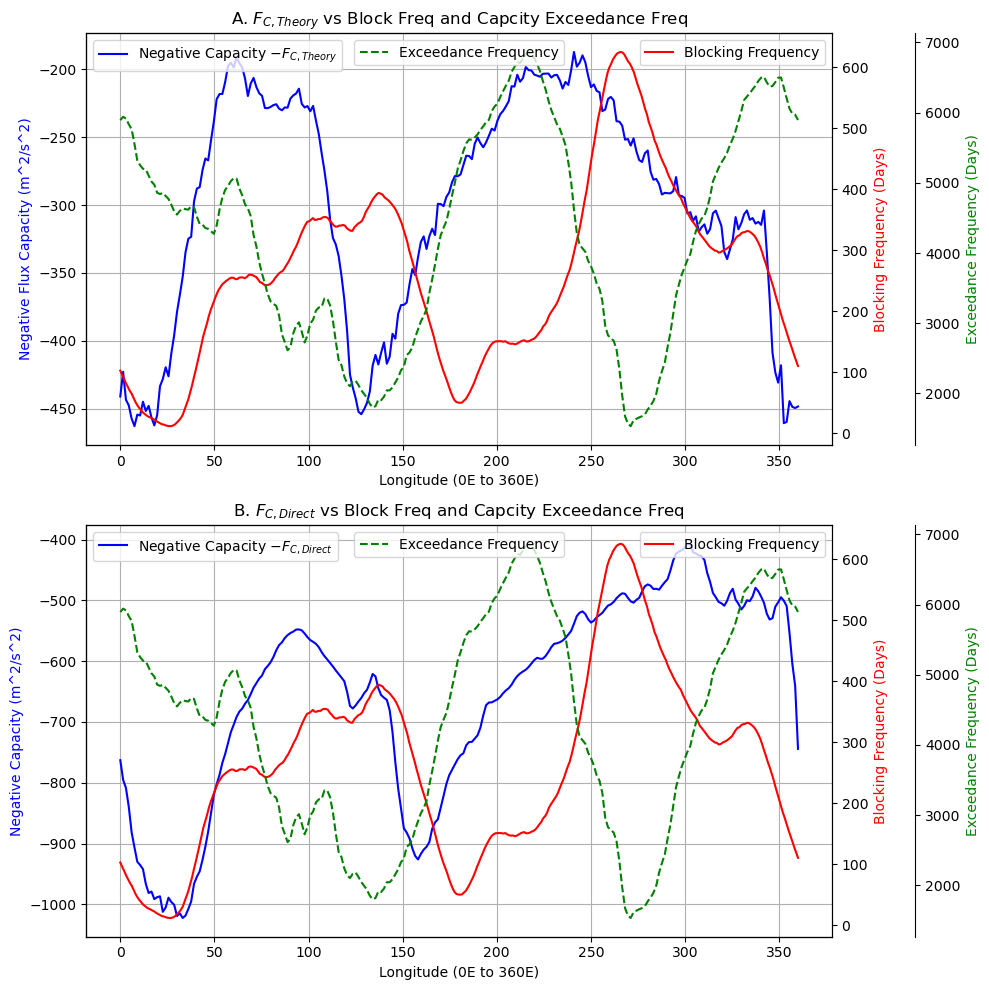

In [28]:

#### Correct

file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis/", "zonal_freq.npy")
exceedance_freq = np.load(file_path)

import matplotlib.pyplot as plt
import numpy as np



# Define the longitudes
longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

# Create a figure
plt.figure(figsize=(10, 10))

# Create the first subplot
ax1 = plt.subplot(2, 1, 1)  # 1 row, 2 columns, 1st subplot
ax2 = ax1.twinx()
ax5 = ax1.twinx()

# Plot on the first subplot
ax1.plot(longitudes, -(reduced_Cg_avg_1D + zonal_avg_Uref - 2 * zonal_avg_product) ** 2 / (4 * zonal_avg_alpha), label=r'Negative Capacity $-F_{C, Theory}$', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax5.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='green', linestyle='--')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Flux Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency (Days)', color='red')
ax1.set_title(r'A. $F_{C, Theory}$ vs Block Freq and Capcity Exceedance Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Adjust the position of the rightmost y-axis
ax5.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Exceedance Frequency (Days)', color='green')
ax5.legend(loc='upper center')

# Create the second subplot
ax3 = plt.subplot(2, 1, 2)  # 1 row, 2 columns, 2nd subplot
ax4 = ax3.twinx()
ax6 = ax3.twinx()

# Plot on the second subplot
ax3.plot(longitudes, -zonal_avg_flux_cap, label=r'Negative Capacity $-F_{C, Direct}$', color='blue')
ax4.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax6.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='green', linestyle='--')

ax3.set_xlabel('Longitude (0E to 360E)')
ax3.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax4.set_ylabel('Blocking Frequency (Days)', color='red')
ax3.set_title(r'B. $F_{C, Direct}$ vs Block Freq and Capcity Exceedance Freq')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.grid(True)

# Adjust the position of the rightmost y-axis
ax6.spines['right'].set_position(('outward', 60))
ax6.set_ylabel('Exceedance Frequency (Days)', color='green')
ax6.legend(loc='upper center')

# Show the plot with adjusted layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # Increase the horizontal spacing between subplots
plt.show()


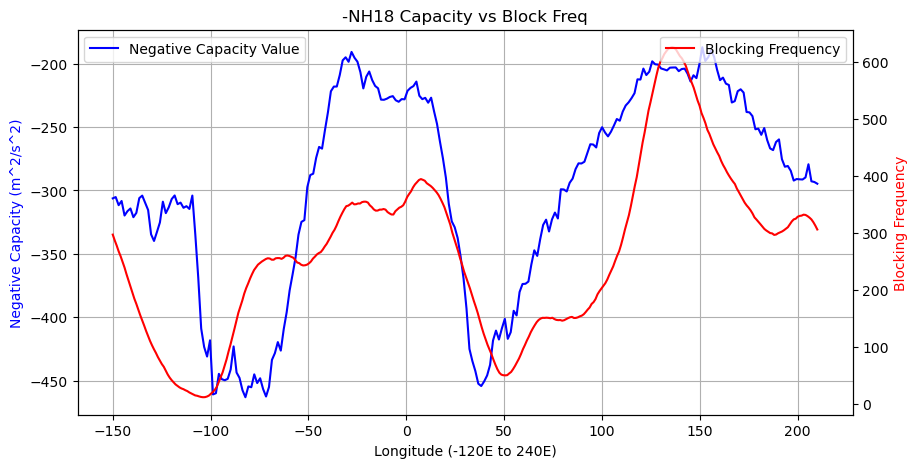

In [29]:
# Assuming the original data arrays are named 'reduced_Cg_avg_1D', 'zonal_avg_Uref', 'zonal_avg_product', 'zonal_avg_alpha', and 'zonal_avg_b'

def split_and_swap(array, split_index):
    first_part = array[:split_index]
    second_part = array[split_index:]
    return np.concatenate((second_part, first_part))

# Calculate the split indices for 60E centering
split_index_240 = 60 * 240 // 360  # For the array of length 240
split_index_360 = 60 * 360 // 360  # For the array of length 360

# Apply the split_and_swap function to all data with the appropriate split index
modified_reduced_Cg_avg_1D = split_and_swap(reduced_Cg_avg_1D, split_index_240)
modified_zonal_avg_Uref = split_and_swap(zonal_avg_Uref, split_index_240)
modified_zonal_avg_product = split_and_swap(zonal_avg_product, split_index_240)
modified_zonal_avg_alpha = split_and_swap(zonal_avg_alpha, split_index_240)
modified_zonal_avg_b = split_and_swap(zonal_avg_b, split_index_360)

# Update the longitudes to center at 60E
longitudes = np.linspace(-150, 210, 240)  # Adjusted for the 240 length array
longitudes2 = np.linspace(-150, 210, 360)  # Adjusted for the 360 length array

# Now create your plot with the modified data and longitudes
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot with the modified data
ax1.plot(longitudes, -(modified_reduced_Cg_avg_1D + modified_zonal_avg_Uref - 2 * modified_zonal_avg_product) ** 2 / (4 * modified_zonal_avg_alpha), label='Negative Capacity Value', color='blue')
ax2.plot(longitudes2, modified_zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (-120E to 240E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-NH18 Capacity vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

plt.show()


In [25]:
# 将数据分成两部分并交换位置
def split_and_swap(array):
    first_part = array[:80]  # 0到120度
    second_part = array[80:]  # 120到360度
    return np.concatenate((second_part, first_part))

def split_and_swap2(array):
    first_part = array[:120]  # 0到120度
    second_part = array[120:]  # 120到360度
    return np.concatenate((second_part, first_part))

# 应用此函数到所有数据
# modified_zonal_avg_Cg = split_and_swap(zonal_avg_Cg)
modified_zonal_avg_Cg = split_and_swap(reduced_Cg_avg_1D)
modified_zonal_avg_Uref = split_and_swap(zonal_avg_Uref)
modified_zonal_avg_product = split_and_swap(zonal_avg_product)
modified_zonal_avg_alpha = split_and_swap(zonal_avg_alpha)
modified_zonal_avg_b = split_and_swap2(zonal_avg_b)


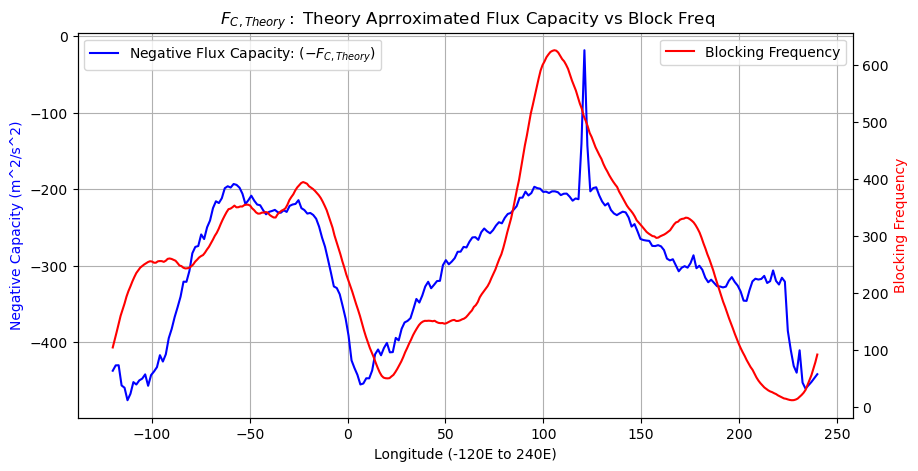

In [23]:
longitudes = np.linspace(-120, 240, 240)
longitudes2 = np.linspace(-120, 240, 360)

plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(modified_zonal_avg_Cg+modified_zonal_avg_Uref-2*modified_zonal_avg_product)**2/(4*modified_zonal_avg_alpha), label=r'Negative Flux Capacity: ($-F_{C, Theory}$)', color='blue')
ax2.plot(longitudes2, modified_zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (-120E to 240E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title(r' $F_{C, Theory}:$ Theory Aprroximated Flux Capacity vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()



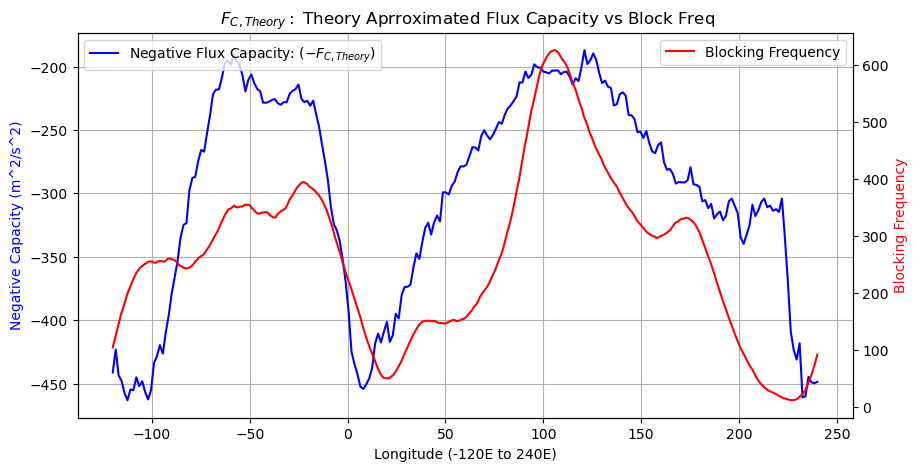

In [26]:
longitudes = np.linspace(-120, 240, 240)
longitudes2 = np.linspace(-120, 240, 360)

plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(modified_zonal_avg_Cg+modified_zonal_avg_Uref-2*modified_zonal_avg_product)**2/(4*modified_zonal_avg_alpha), label=r'Negative Flux Capacity: ($-F_{C, Theory}$)', color='blue')
ax2.plot(longitudes2, modified_zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (-120E to 240E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title(r' $F_{C, Theory}:$ Theory Aprroximated Flux Capacity vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()



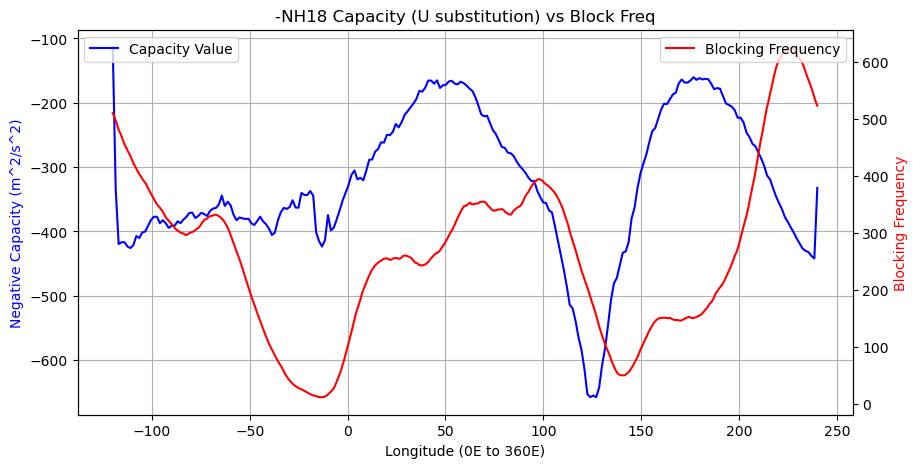

In [24]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(zonal_avg_Cg+3*zonal_avg_Uref-2*zonal_avg_u0)**2/(4*zonal_avg_alpha), label='Capacity Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-NH18 Capacity (U substitution) vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

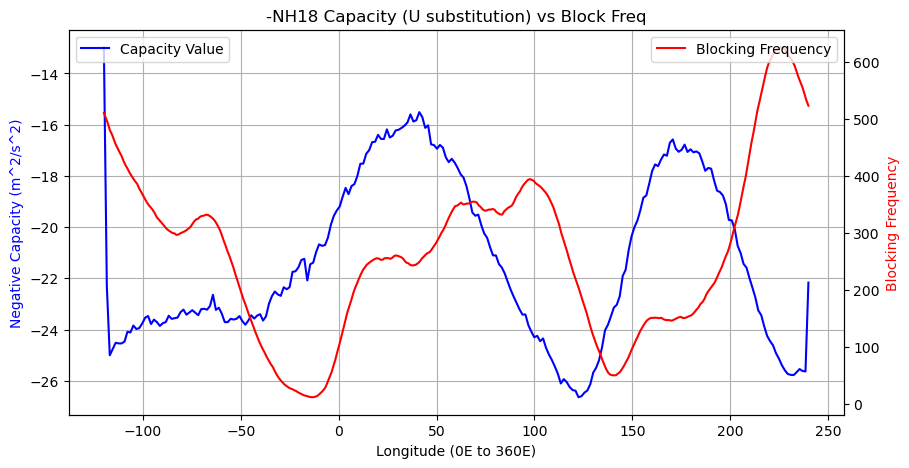

In [25]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(zonal_avg_Cg+3*zonal_avg_Uref-2*zonal_avg_u0), label='Capacity Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-NH18 Capacity (U substitution) vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

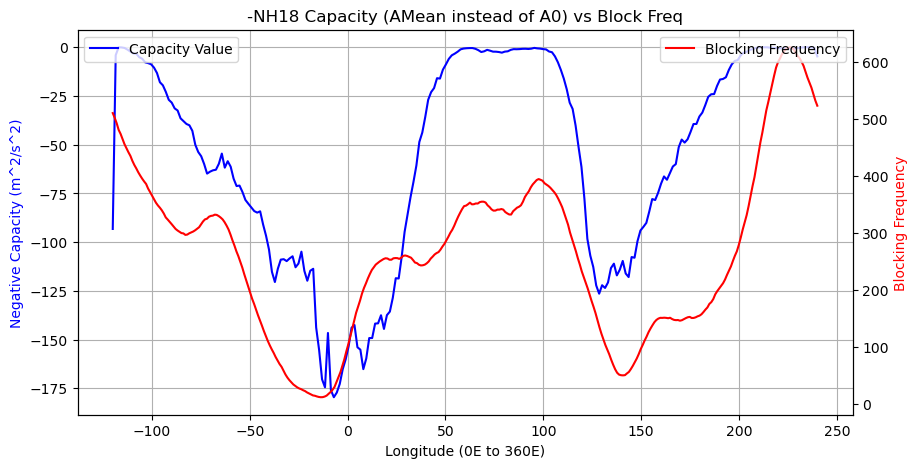

In [26]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(zonal_avg_Cg+zonal_avg_Uref-2*zonal_avg_Amean *zonal_avg_alpha)**2/(4*zonal_avg_alpha), label='Capacity Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-NH18 Capacity (AMean instead of A0) vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

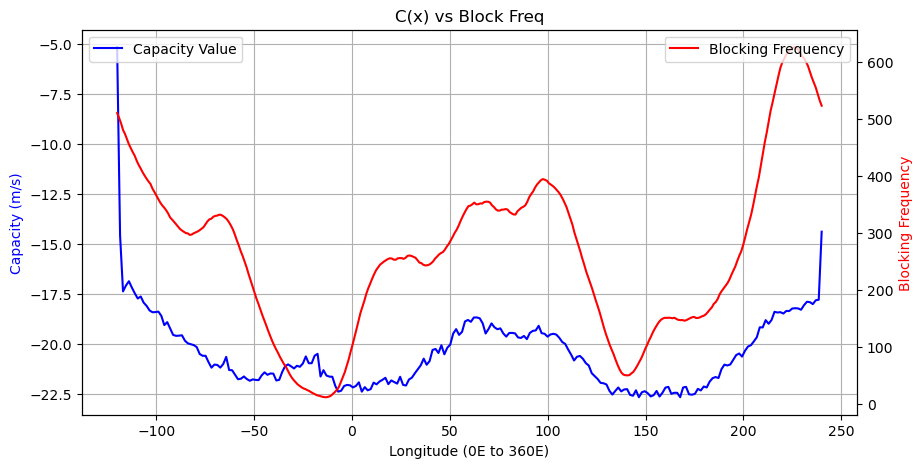

In [27]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -(zonal_avg_Cg+zonal_avg_Uref-2*zonal_avg_product), label='Capacity Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Capacity (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('C(x) vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

In [28]:
capacity = zonal_avg_Cg+zonal_avg_Uref-2*zonal_avg_product
capacity_Cg = 14+zonal_avg_Uref-2*zonal_avg_product
print(capacity_Cg.shape)

(240,)


In [29]:
import numpy as np

# Original data
lon_original = np.linspace(0, 360, 240)
capacity_original = capacity
capacity_original_Cg = capacity_Cg

# New grid
lon_new = np.linspace(0, 360, 1024)

# Interpolate to new grid
capacity_interpolated = np.interp(lon_new, lon_original, capacity_original)
capacity_interpolated_Cg = np.interp(lon_new, lon_original, capacity_original_Cg)

# Check the shape
print(capacity_interpolated.shape)  # This should print (1024,)

# Save to .npy file
output_path = "/depot/wanglei/etc/KenYan_Traffic_Model/capacity_interpolated.npy"
output_path = "/depot/wanglei/etc/KenYan_Traffic_Model/capacity_interpolated_Cg.npy"
np.save(output_path, capacity_interpolated)
np.save(output_path,capacity_interpolated_Cg)

print(f"Data saved to {output_path}")


(1024,)
Data saved to /depot/wanglei/etc/KenYan_Traffic_Model/capacity_interpolated_Cg.npy


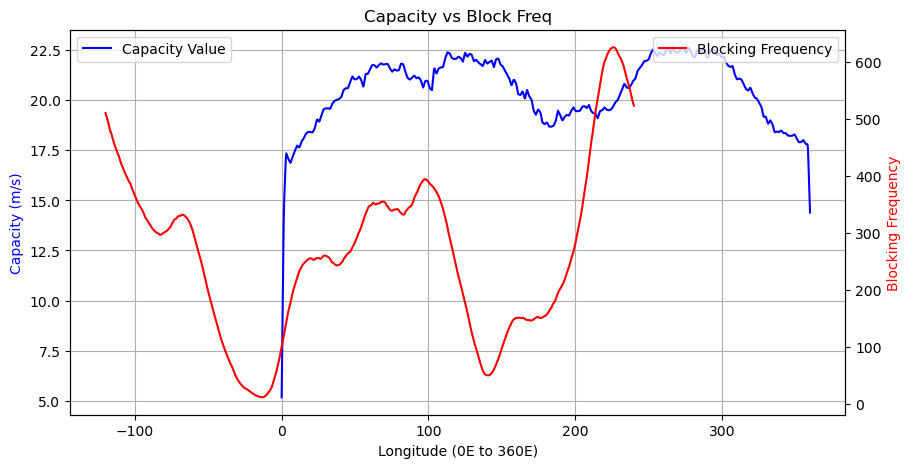

In [30]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(np.linspace(0, 360, 1024), capacity_interpolated, label='Capacity Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Capacity (m/s)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('Capacity vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

In [31]:
import numpy as np

# Original data
lon_original = np.linspace(0, 360, 240)
a0_original = zonal_avg_a0

# New grid
lon_new = np.linspace(0, 360, 1024)

# Interpolate to new grid
a0_interpolated = np.interp(lon_new, lon_original, a0_original)

# Check the shape
print(a0_interpolated.shape)  # This should print (1024,)

# Save to .npy file
output_path = "/depot/wanglei/etc/KenYan_Traffic_Model/a0_interpolated.npy"
np.save(output_path, a0_interpolated)

print(f"Data saved to {output_path}")
print(a0_interpolated)


(1024,)
Data saved to /depot/wanglei/etc/KenYan_Traffic_Model/a0_interpolated.npy
[5.06661019 5.02638151 4.98615283 ... 5.0887331  5.06920188 5.04967066]


In [32]:
import numpy as np

# Original data
lon_original = np.linspace(0, 360, 240)
alpha_original = zonal_avg_alpha

# New grid
lon_new = np.linspace(0, 360, 1024)

# Interpolate to new grid
alpha_interpolated = np.interp(lon_new, lon_original, alpha_original)

# Check the shape
print(alpha_interpolated.shape)  # This should print (1024,)

# Save to .npy file
output_path = "/depot/wanglei/etc/KenYan_Traffic_Model/alpha_interpolated.npy"
np.save(output_path, alpha_interpolated)

print(f"Data saved to {output_path}")
print(alpha_interpolated)

(1024,)
Data saved to /depot/wanglei/etc/KenYan_Traffic_Model/alpha_interpolated.npy
[0.37020681 0.37068475 0.37116269 ... 0.37050392 0.36999159 0.36947925]


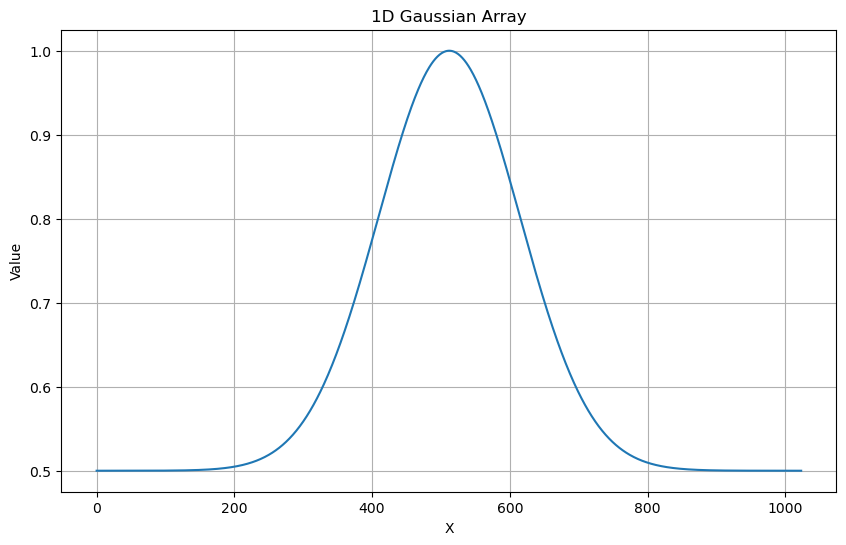

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
n = 1024  # size of the array
mean = n / 2  # mean of the Gaussian, positioned at x=512
sigma = n / 10  # standard deviation of the Gaussian
output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model"
file_name = "test_capacity.npy"

# Generate x values
x = np.linspace(0, n-1, n)

# Generate the Gaussian array
test_capacity = 0.5*np.exp(-0.5 * ((x - mean) / sigma) ** 2)+0.5

# Save the array to a .npy file
file_path = os.path.join(output_directory, file_name)
np.save(file_path, test_capacity)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, test_capacity)
plt.title('1D Gaussian Array')
plt.xlabel('X')
plt.ylabel('Value')
plt.grid(True)
plt.show()


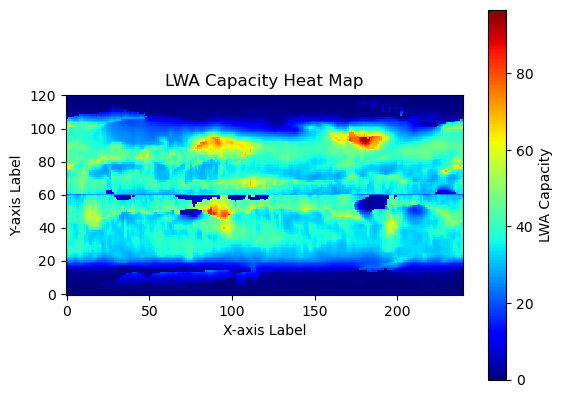

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "/scratch/negishi/yan481/KenYan_Traffic_Model/LWA_Capacity_DJF.npy"
flux_capacity_2d = np.load(file_path)

# Plot the 2D heat map
plt.imshow(flux_capacity_2d, cmap='jet', origin = 'lower', interpolation='nearest')
plt.colorbar(label='LWA Capacity')
plt.title('LWA Capacity Heat Map')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


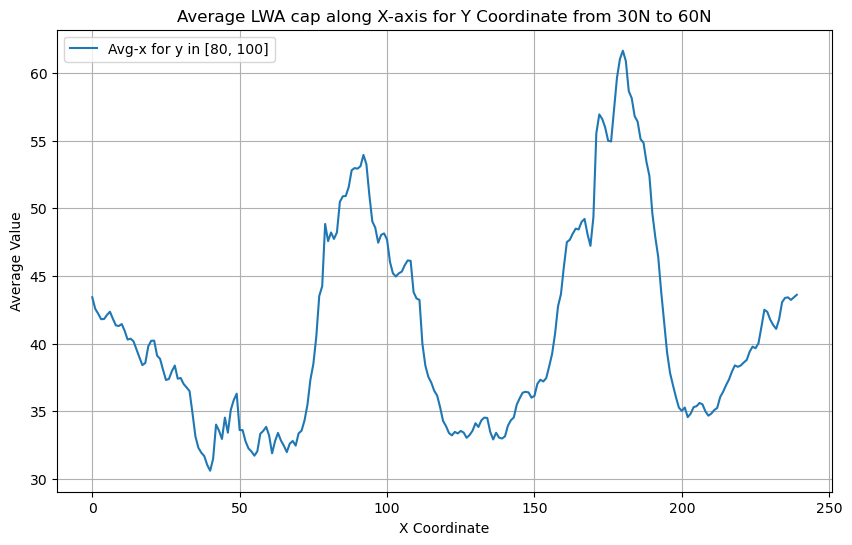

In [35]:
y_range_data = flux_capacity_2d[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_lwa_cap = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_lwa_cap, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average LWA cap along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


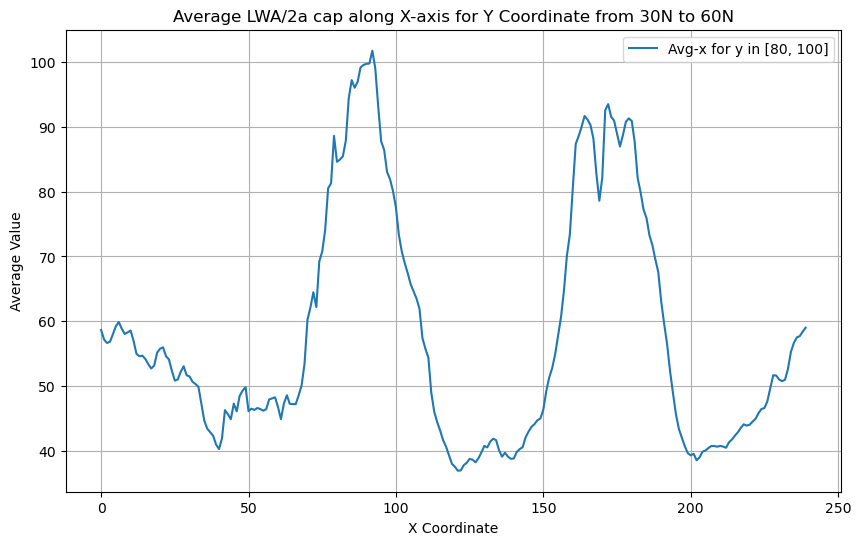

In [36]:
reanalysis_cap = zonal_avg_lwa_cap/(2*zonal_avg_alpha)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reanalysis_cap, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average LWA/2a cap along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()

output_directory = "/depot/wanglei/etc/KenYan_Traffic_Model"
file_name = "reanalysis_capacity.npy"

# Save the array to a .npy file
file_path = os.path.join(output_directory, file_name)

lon_original = np.linspace(0, 360, 240)

# New grid
lon_new = np.linspace(0, 360, 1024)

# Interpolate to new grid
reanalysis_cap_interpolated = np.interp(lon_new, lon_original, reanalysis_cap)

np.save(file_path, reanalysis_cap_interpolated)



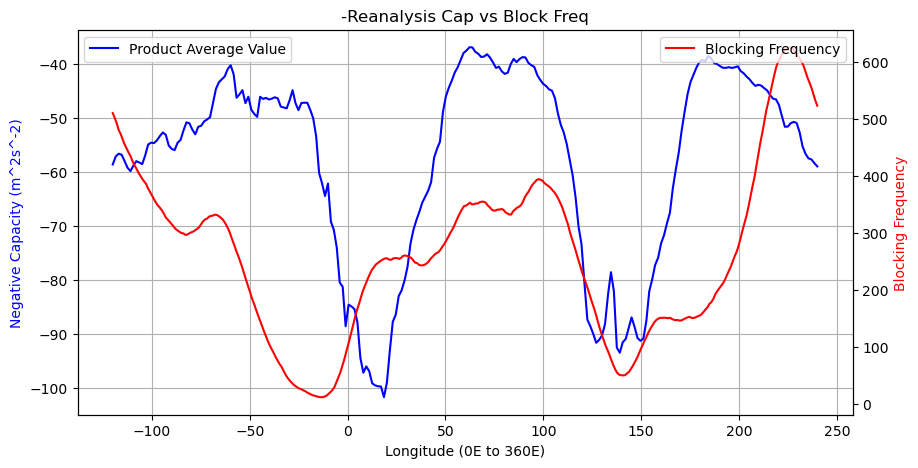

In [37]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -reanalysis_cap, label='Product Average Value', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Capacity (m^2s^-2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title('-Reanalysis Cap vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()

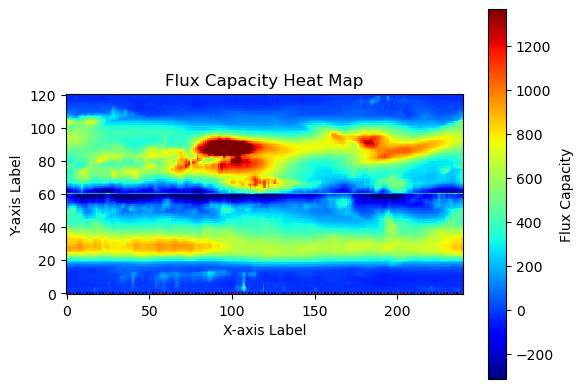

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "/scratch/negishi/yan481/KenYan_Traffic_Model/Flux_Capacity_DJF.npy"
capacity = np.load(file_path)

# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)


# Clip the capacity values to lie within the determined min and max
flux_capacity_2d = np.clip(capacity, vmin_val, vmax_val)

# Plot the 2D heat map
plt.imshow(flux_capacity_2d, cmap='jet', origin = 'lower', interpolation='nearest')
plt.colorbar(label='Flux Capacity')
plt.title('Flux Capacity Heat Map')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


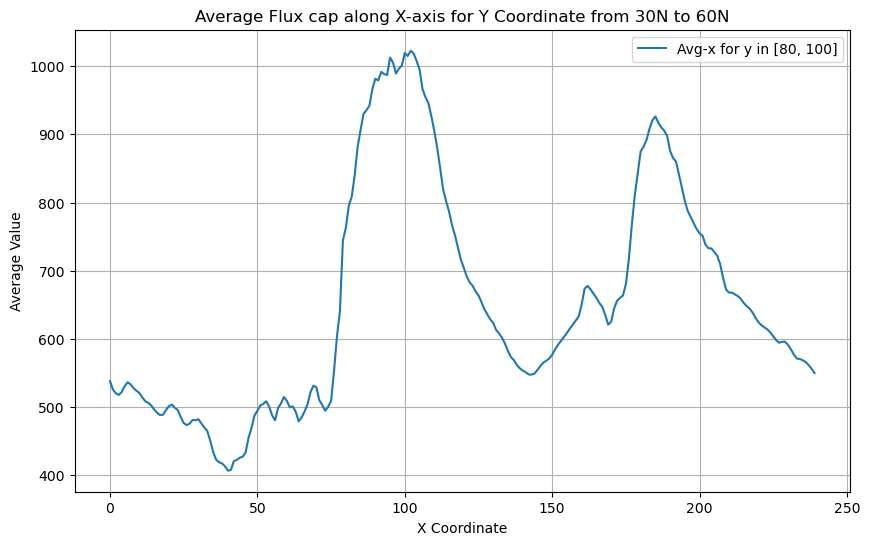

In [33]:
y_range_data = flux_capacity_2d[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_flux_cap = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_flux_cap, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average Flux cap along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
reanalysis_cap = zonal_avg_flux_cap
print(reanalysis_cap.shape)

(240,)


In [41]:
# 将数据分成两部分并交换位置
def split_and_swap(array):
    first_part = array[:80]  # 0到120度
    second_part = array[80:]  # 120到360度
    return np.concatenate((second_part, first_part))

def split_and_swap2(array):
    first_part = array[:120]  # 0到120度
    second_part = array[120:]  # 120到360度
    return np.concatenate((second_part, first_part))

# 应用此函数到所有数据
modified_reanalysis_cap = split_and_swap(reanalysis_cap)

modified_zonal_avg_b = split_and_swap2(zonal_avg_b)


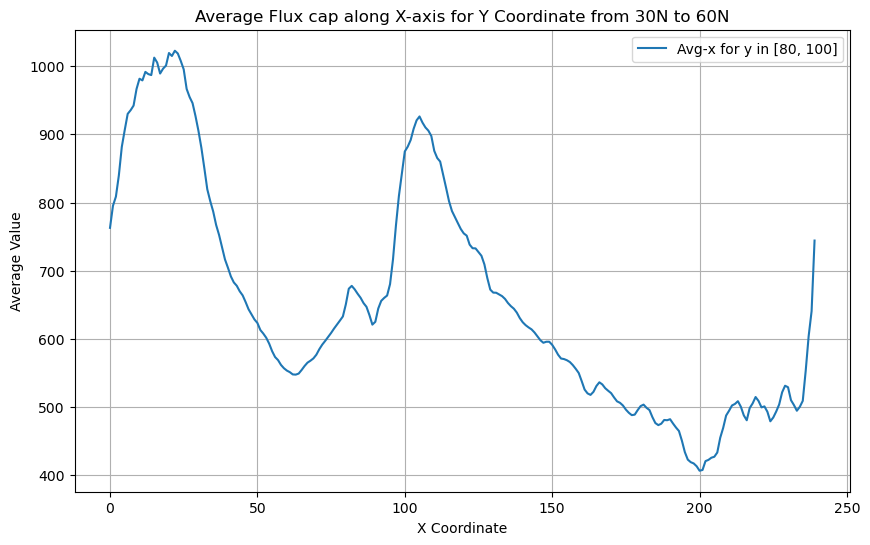

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(modified_reanalysis_cap, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average Flux cap along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


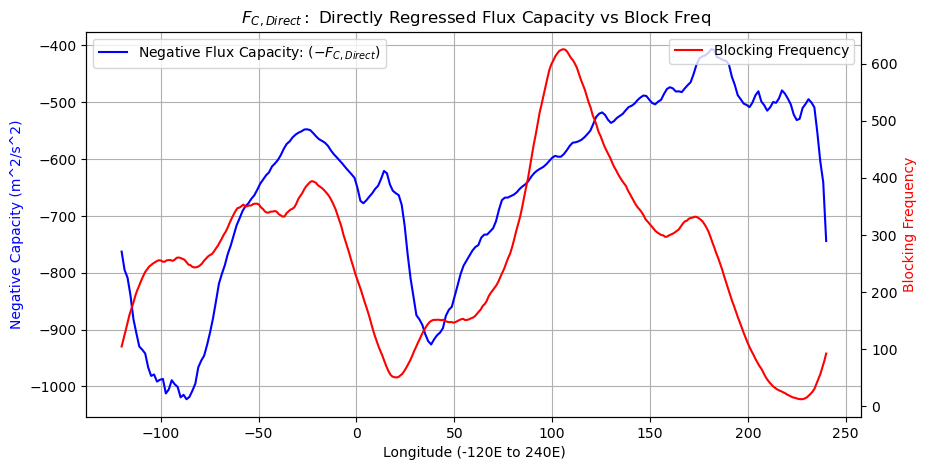

In [43]:


plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(longitudes, -modified_reanalysis_cap, label=r'Negative Flux Capacity: ($-F_{C, Direct}$)', color='blue')
ax2.plot(longitudes2, modified_zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (-120E to 240E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')

ax1.set_title(r' $F_{C, Direct}:$ Directly Regressed Flux Capacity vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()


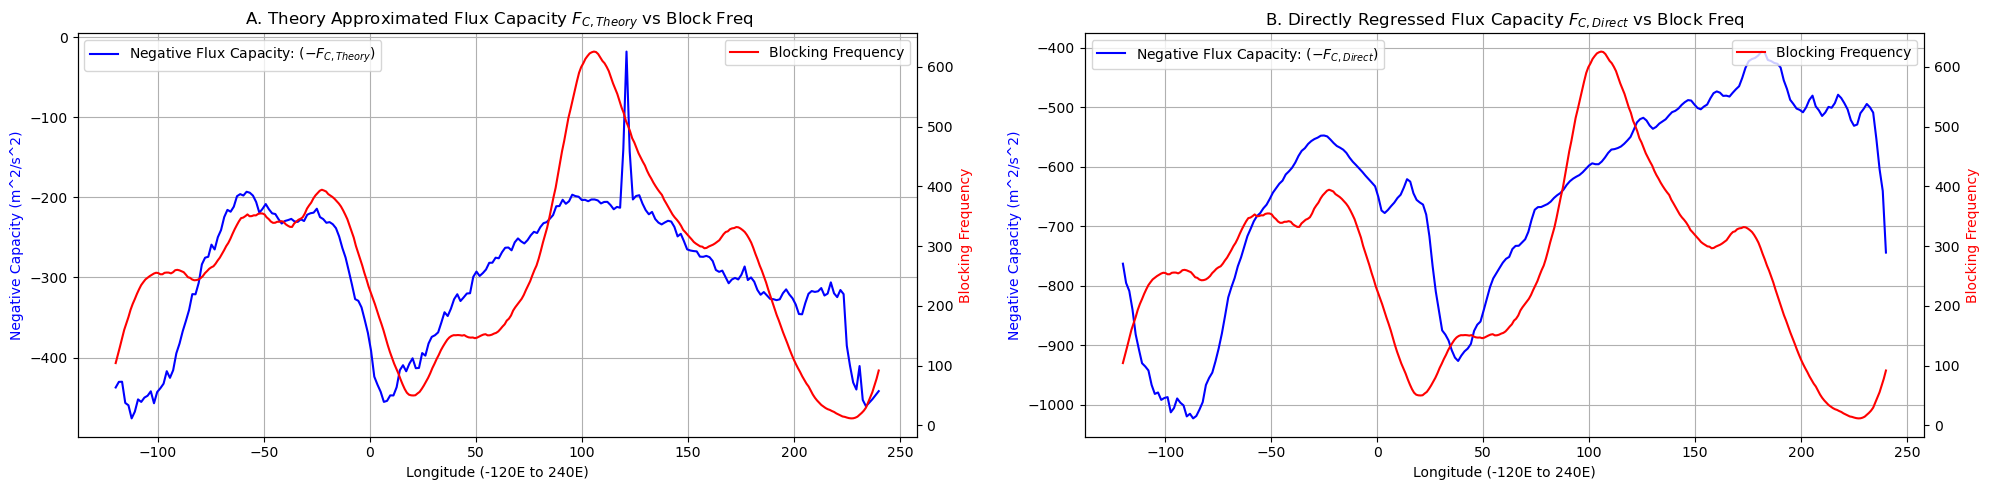

In [49]:

#### COrrect

# 导入必要的库
import matplotlib.pyplot as plt
import numpy as np

# 假设这些变量已经被正确地定义和计算
# longitudes = np.linspace(-120, 240, 240)
# longitudes2 = np.linspace(-120, 240, 360)
# modified_zonal_avg_Cg, modified_zonal_avg_Uref, modified_zonal_avg_product, modified_zonal_avg_alpha
# modified_zonal_avg_b, modified_reanalysis_cap

# 创建一个画布，并设置其大小
plt.figure(figsize=(20,5))

# 创建第一个子图
ax1 = plt.subplot(1, 2, 1)  # 1行，2列中的第1个
ax2 = ax1.twinx()  # 与ax1共享x轴

ax1.plot(longitudes, -(modified_zonal_avg_Cg+modified_zonal_avg_Uref-2*modified_zonal_avg_product)**2/(4*modified_zonal_avg_alpha), label=r'Negative Flux Capacity: ($-F_{C, Theory}$)', color='blue')
ax2.plot(longitudes2, modified_zonal_avg_b, label='Blocking Frequency', color='red')

ax1.set_xlabel('Longitude (-120E to 240E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency', color='red')
ax1.set_title(r' A. Theory Approximated Flux Capacity $F_{C, Theory}$ vs Block Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# 创建第二个子图
ax3 = plt.subplot(1, 2, 2)  # 1行，2列中的第2个
ax4 = ax3.twinx()  # 与ax3共享x轴

ax3.plot(longitudes, -modified_reanalysis_cap, label=r'Negative Flux Capacity: ($-F_{C, Direct}$)', color='blue')
ax4.plot(longitudes2, modified_zonal_avg_b, label='Blocking Frequency', color='red')

ax3.set_xlabel('Longitude (-120E to 240E)')
ax3.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax4.set_ylabel('Blocking Frequency', color='red')
ax3.set_title(r'B. Directly Regressed Flux Capacity $F_{C, Direct}$ vs Block Freq')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.grid(True)

# 显示整个画布
plt.tight_layout()  # 调整子图布局
# 调整子图之间的间距
plt.subplots_adjust(wspace=0.2)  # 增加子图之间的水平间距
plt.show()
